<a href="https://colab.research.google.com/github/nicoletseng620/data/blob/main/nicoletseng620_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data.xlsx')

# New Section

In [ ]:
data.head()

age  sex  cp  trestbps  chol    fbs                       restecg  thalach  \
0   63    1   3       145   233   True  left ventricular hypertrophy      150   
1   37    1   2       130   250  False                        normal      187   
2   41    0   1       130   204  False  left ventricular hypertrophy      172   
3   56    1   1       120   236  False                        normal      178   
4   57    0   0       120   354  False                        normal      163   

   exang  oldpeak  slope   ca  thal  target  
0      0      2.3      0  0.0   1.0       1  
1      0      3.5      0  0.0   2.0       1  
2      0      1.4      2  0.0   2.0       1  
3      0      0.8      2  0.0   2.0       1  
4      1      0.6      2  0.0   2.0       1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       284 non-null    int64  
 1   sex       284 non-null    int64  
 2   cp        284 non-null    int64  
 3   trestbps  284 non-null    int64  
 4   chol      284 non-null    int64  
 5   fbs       284 non-null    object 
 6   restecg   284 non-null    object 
 7   thalach   284 non-null    int64  
 8   exang     284 non-null    int64  
 9   oldpeak   284 non-null    float64
 10  slope     284 non-null    int64  
 11  ca        284 non-null    float64
 12  thal      284 non-null    float64
 13  target    284 non-null    int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 33.3+ KB


In [ ]:
# categorical data: sex, cp,fbs,restecg,exang, slope,thal,target
# Ordinal data: ca
# numerical data:age,trestbps,chol,thalach,oldpeak

In [ ]:
data.shape

(303, 14)

In [ ]:
# to know the type of variables
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
#check the data type
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

The variables types are (1) categorical:sex,cp,fbs,restecg,exang,slope,thal,target
(2) Continuous: age, trestbps, chol, thalac, oldpeak (3) Nominal: ca

In [ ]:
# ca: The number of major vessels (0–3), numerical variable
data['ca'].unique()


array([0, 2, 1, 3, 4])

In [ ]:
# variable ca ranges from 0 to 3, However, data appears 0 to 4, so we need to find "4" and change it to NaN
data.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

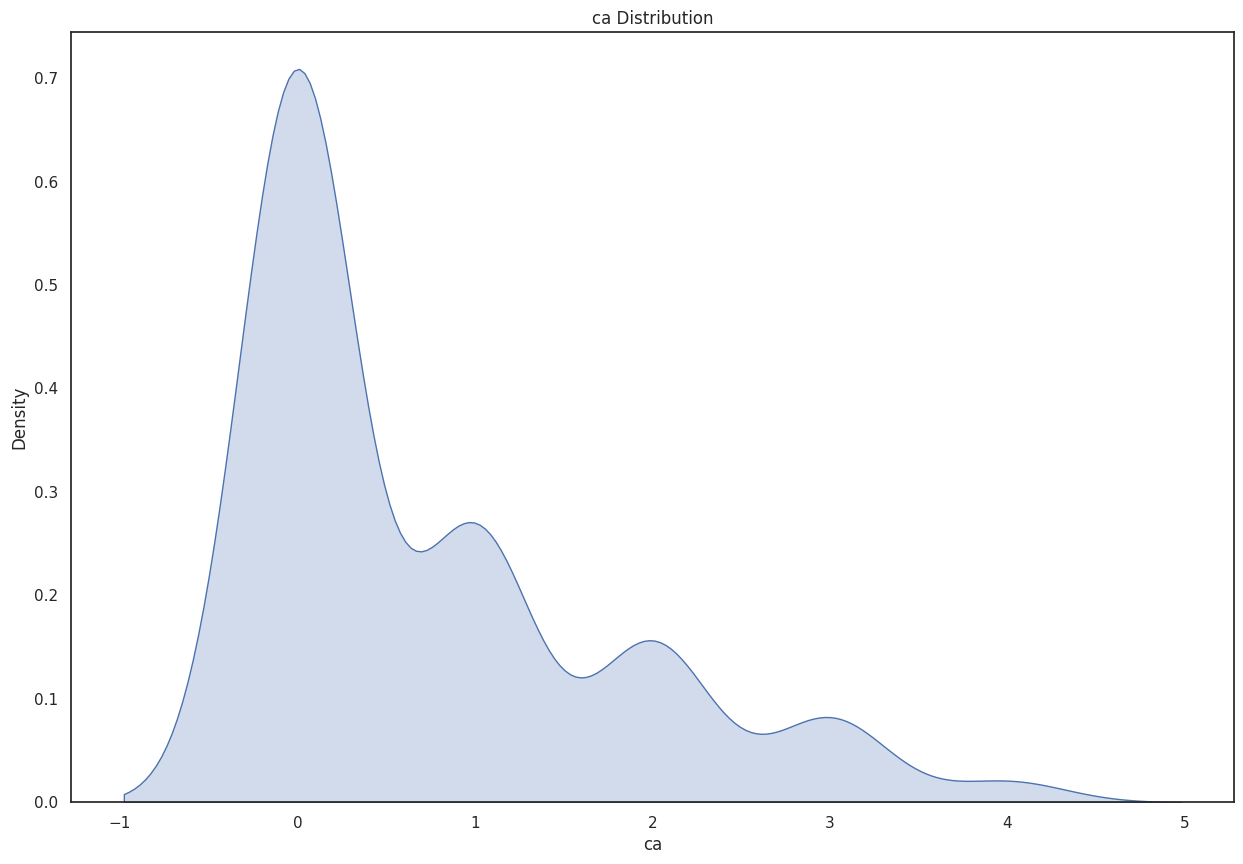

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# plot a kernel density estimate (KDE) distribution of the 'ca' variable
sns.kdeplot(data['ca'], fill=True)

# set the title and axis labels
plt.title("ca Distribution")
plt.xlabel("ca")
plt.ylabel("Density")

# show the plot
plt.show()

In [ ]:
data.ca.mode()

0    0
Name: ca, dtype: int64

In [ ]:
# to find the row of "4"
data['ca']==4


0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: ca, Length: 303, dtype: bool

In [ ]:
data.loc[data['ca']==4]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
92    52    1   2       138   223    0        1      169      0      0.0   
158   58    1   1       125   220    0        1      144      0      0.4   
163   38    1   2       138   175    0        1      173      0      0.0   
164   38    1   2       138   175    0        1      173      0      0.0   
251   43    1   0       132   247    1        0      143      1      0.1   

     slope  ca  thal  target  
92       2   4     2       1  
158      1   4     3       1  
163      2   4     2       1  
164      2   4     2       1  
251      1   4     3       0

In [ ]:
data.loc[data['ca']==4,'ca']

92     4
158    4
163    4
164    4
251    4
Name: ca, dtype: int64

In [ ]:
data.loc[data['ca']==4,'ca']=np.NaN

In [ ]:
data['ca'].unique()

array([ 0.,  2.,  1.,  3., nan])

In [ ]:
data.loc[92,'ca']

nan

In [ ]:
# mode of ca: 0
data['ca'].mode()

0    0.0
Name: ca, dtype: float64

In [ ]:
data['ca'].median()

0.0

In [ ]:
# thal: A blood disorder called thalassemia, categorical variable
# Value 0: NULL (dropped from the dataset previously
# Value 1: fixed defect (no blood flow in some part of the heart)
# Value 2: normal blood flow
# Value 3: reversible defect (a blood flow is observed but it is not normal)
data['thal'].unique()

array([1, 2, 3, 0])

In [ ]:
data['thal'].median()

2.0

In [ ]:
data['thal'].mode()

0    2
Name: thal, dtype: int64

In [ ]:
# "thal" variable: value 0 is null and should be dropped. so thal’ ranges from 1–3. There are 2 values of "0"
data.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

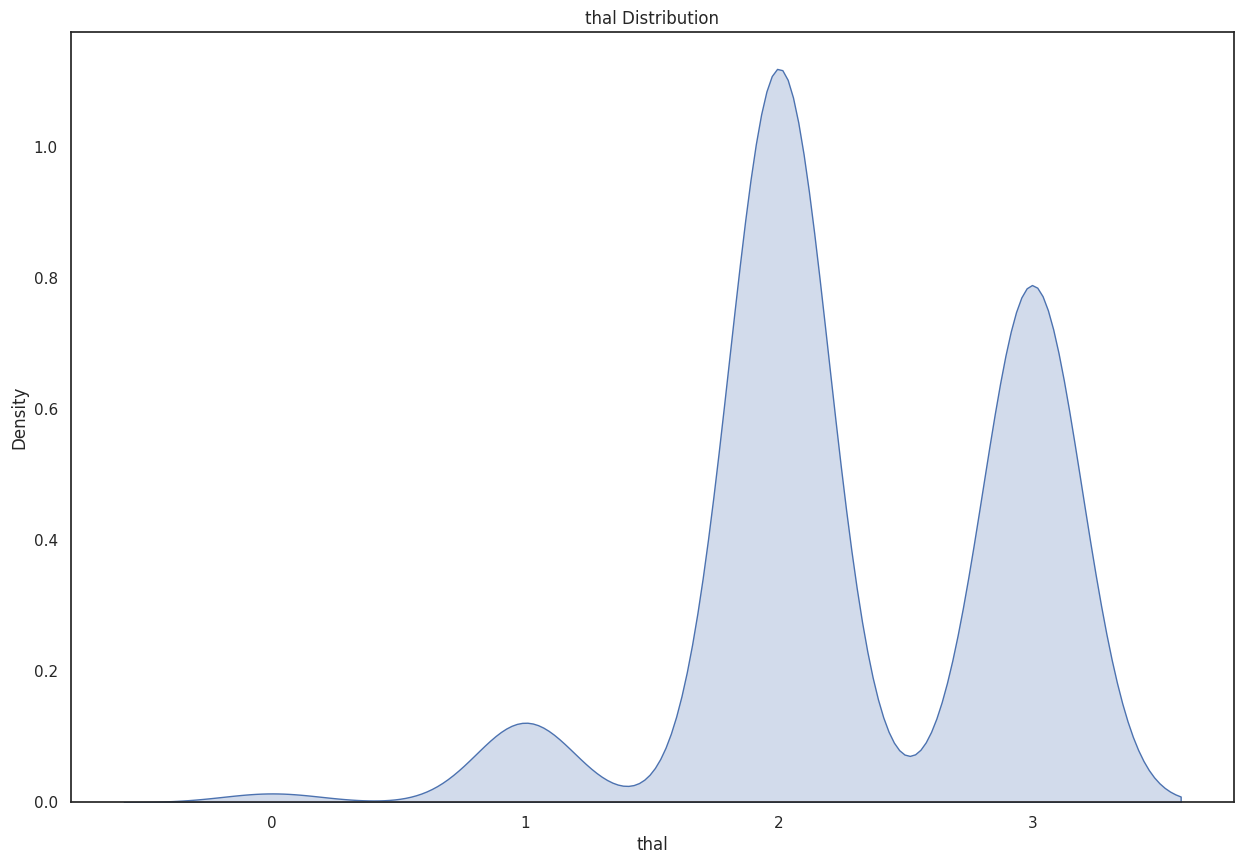

In [ ]:
import seaborn as sns

# plot a kernel density estimate (KDE) distribution of the 'thal' variable
sns.kdeplot(data['thal'], fill=True)

# set the title and axis labels
plt.title("thal Distribution")
plt.xlabel("thal")
plt.ylabel("Density")

# show the plot
plt.show()

In [ ]:
# therefore, we will drop 'thal' value of '0' from the data
data.loc[data['thal']==0,'thal']

48     0
281    0
Name: thal, dtype: int64

In [ ]:
data.loc[data['thal']==0,'thal']=np.NaN
data['thal'].value_counts()

2.0    166
3.0    117
1.0     18
Name: thal, dtype: int64

In [ ]:
data['thal'].unique()

array([ 1.,  2.,  3., nan])

In [ ]:
# check for missing values to replace them
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

In [ ]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
target        2
dtype: int64

<Axes: >

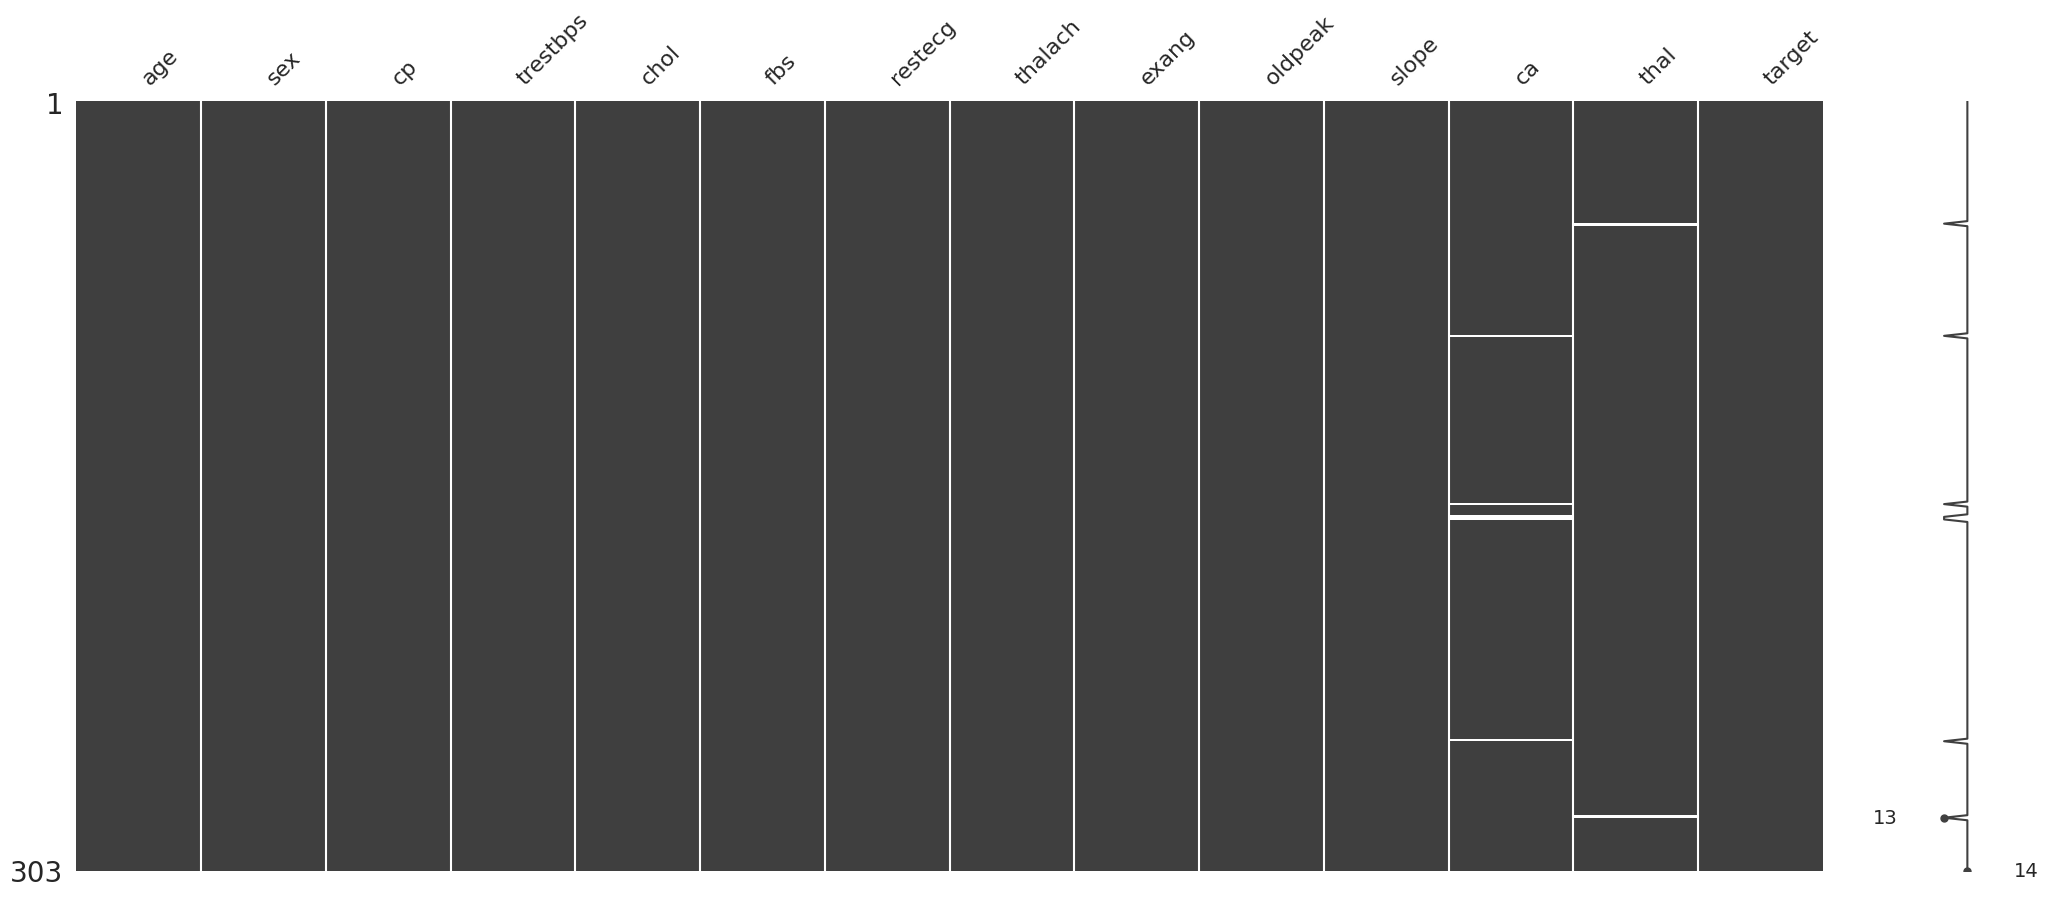

In [ ]:
# visualize the missing values using Missingno library.
import pandas as pd
import missingno as msno
msno.matrix(data)

In [ ]:
data['ca'].value_counts()


0.0    175
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [ ]:
data['thal'].value_counts()

2.0    166
3.0    117
1.0     18
Name: thal, dtype: int64

In [ ]:
# replace the NaN value with median
data=data.fillna(data.median())
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope   ca  thal  target  
0        0  0.0   1.0       1  
1        0  0.0   2.0       1  
2        2  0.0   2.0       1  
3        2  0.0   2.0       1  
4        2  0.0   2.0       1  
..     ...  ...   ...     ...  
298      1  0.0   3.0       0  
299      1  0.0   3.0       0  
300      1  2.0   3.0       0  
301      1  1.0   3.0       0  
302      1  1.0   2.0       0  

[303 rows x 14 columns]

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# check for duplicate rows
duplicated=data.duplicated().sum()
duplicated

1

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [ ]:
data.duplicated(keep=False)

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [ ]:
duplicated=data[data.duplicated(keep=False)]
duplicated

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
163   38    1   2       138   175    0        1      173      0      0.0   
164   38    1   2       138   175    0        1      173      0      0.0   

     slope   ca  thal  target  
163      2  0.0   2.0       1  
164      2  0.0   2.0       1

In [ ]:
duplicated.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
163   38    1   2       138   175    0        1      173      0      0.0   
164   38    1   2       138   175    0        1      173      0      0.0   

     slope   ca  thal  target  
163      2  0.0   2.0       1  
164      2  0.0   2.0       1

In [ ]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.663366   
std      0.525860   22.905161    0.469794    1.161075    0.616226    0.934375   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    3.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.326733    0.544554  
std      0.583020    0.498835  
min      1.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [ ]:
# age: numerical variable
data['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

In [ ]:
data.age.describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [ ]:
# mode of age:58 years old
data['age'].mode()

0    58
Name: age, dtype: int64

In [ ]:
data['age'].median()

55.0

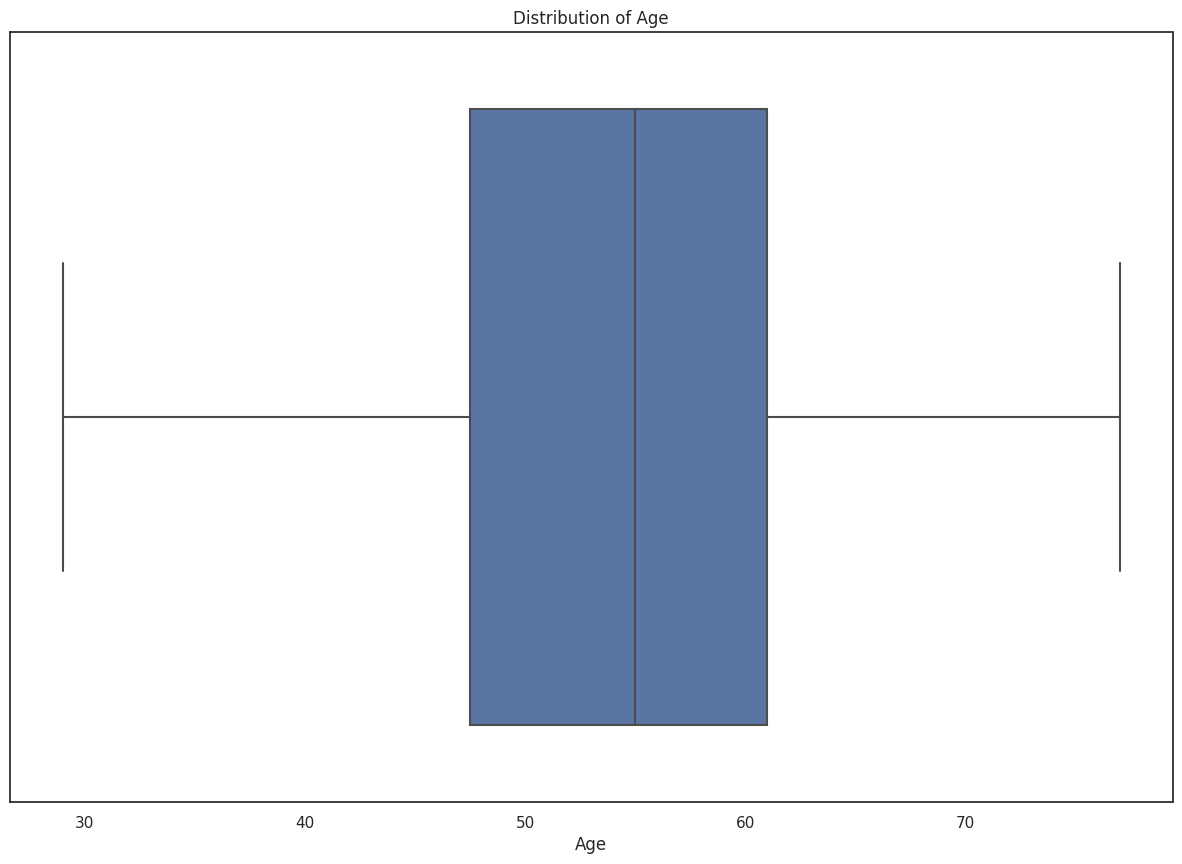

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=data['age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

<Axes: xlabel='age', ylabel='Count'>

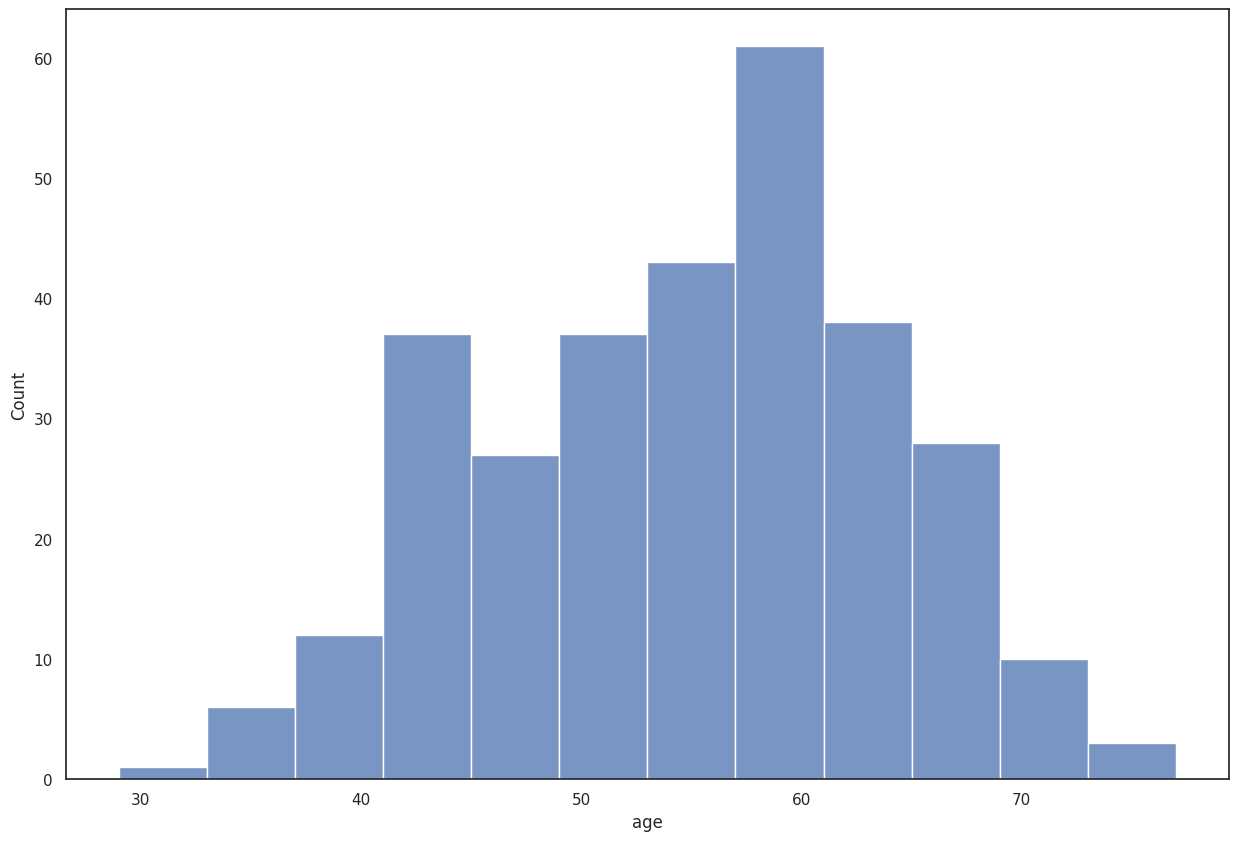

In [ ]:
sns.histplot(data=data, x="age")

<ipython-input-235-3133294fd608>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['age'], shade=True)


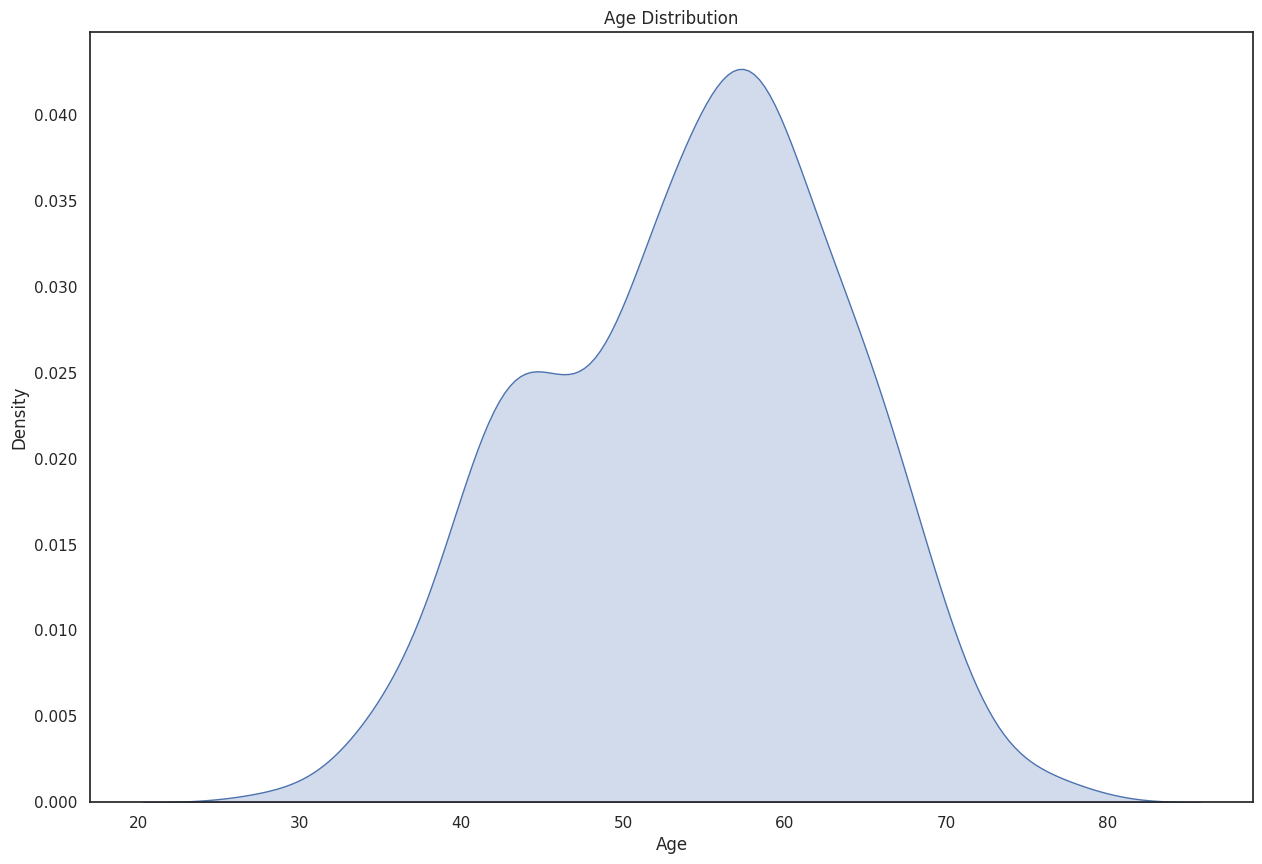

In [ ]:
import seaborn as sns

# plot a kernel density estimate (KDE) distribution of the 'age' variable
sns.kdeplot(data['age'], shade=True)

# set the title and axis labels
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Density")

# show the plot
plt.show()

The plot graph does not show outlier in "Age"

In [ ]:
def find_outliers():
  Q1_age = np.percentile(data.age,25)
  Q3_age = np.percentile(data.age,75)
  IQR=(Q3_age)-(Q1_age)
  Lower_tail = (Q1_age) - 1.5 * IQR
  Upper_tail = (Q3_age) + 1.5 * IQR
  outliers_age=[]
  for i in data.age:
      if i < Lower_tail or i > Upper_tail:
        outliers_age.append(i)
  return outliers_age
outliers_age=find_outliers()

In [ ]:
print(outliers_age)

[]


In [ ]:
num_outliers_age= len(outliers_age)
num_outliers_age

0

No outliers in "age' after calculation

# Outlier_age: None, no outlier value in "age"

In [ ]:
# chest pain: categorical value, Value 3: asymptomatic, Value 1: atypical angina, Value 2: non-anginal pain, Value 0: typical angina

data['cp'].unique()

array([3, 2, 1, 0])

In [ ]:
#mode of chest pain
data['cp'].mode()

0    0
Name: cp, dtype: int64

# Most of people have typical angina

In [ ]:
gb_cp=data.groupby('cp').apply(len)
gb_cp

cp
0    143
1     50
2     87
3     23
dtype: int64

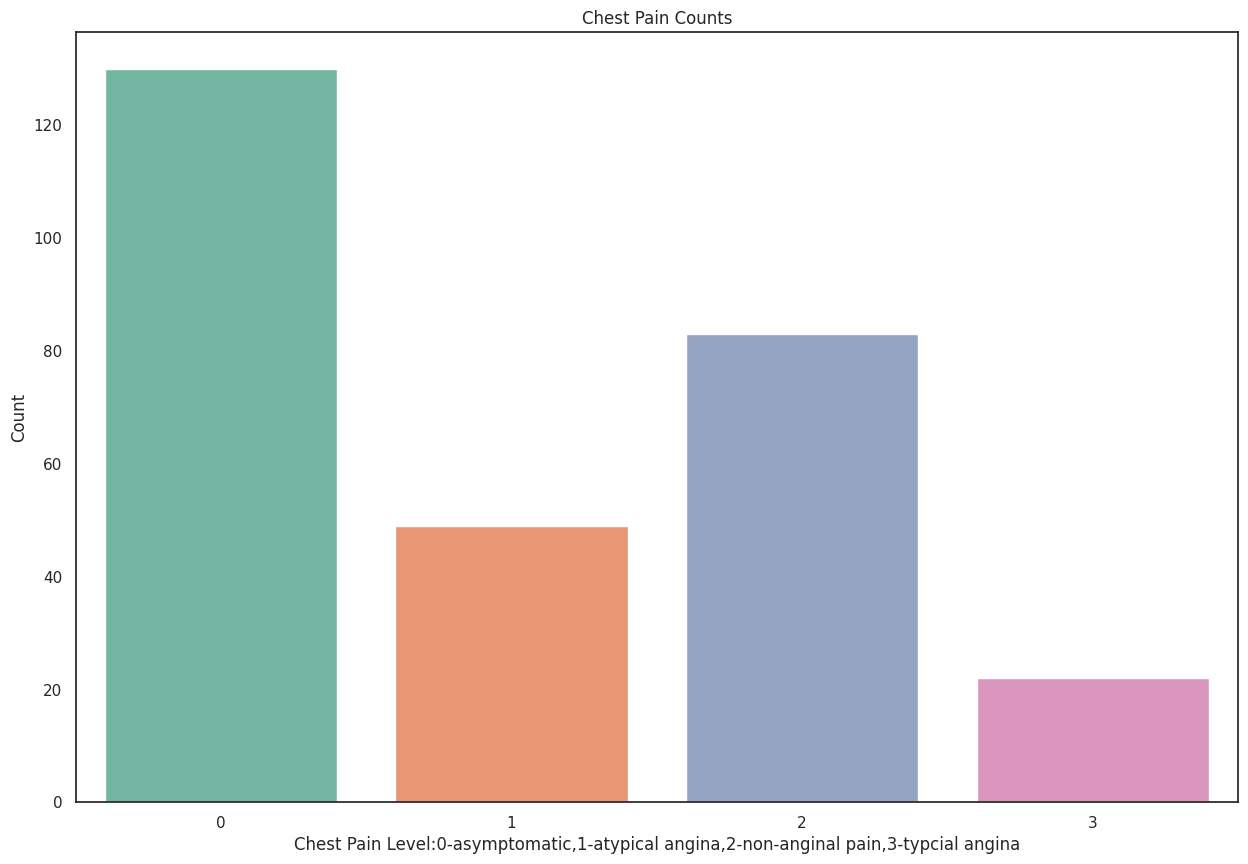

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a sample categorical variable with levels
category= ['3:asymptomatic', '1:atypical agina', '2:non-aginal pain', '0:typical angina']
# plot the category counts with different colors for each level
sns.countplot(x=data['cp'], palette="Set2")

# add labels to the plot
plt.title("Chest Pain Counts")
plt.xlabel("Chest Pain Level:0-asymptomatic,1-atypical angina,2-non-anginal pain,3-typcial angina")
plt.ylabel("Count")

# show the plot
plt.show()

<Axes: xlabel='cp', ylabel='Count'>

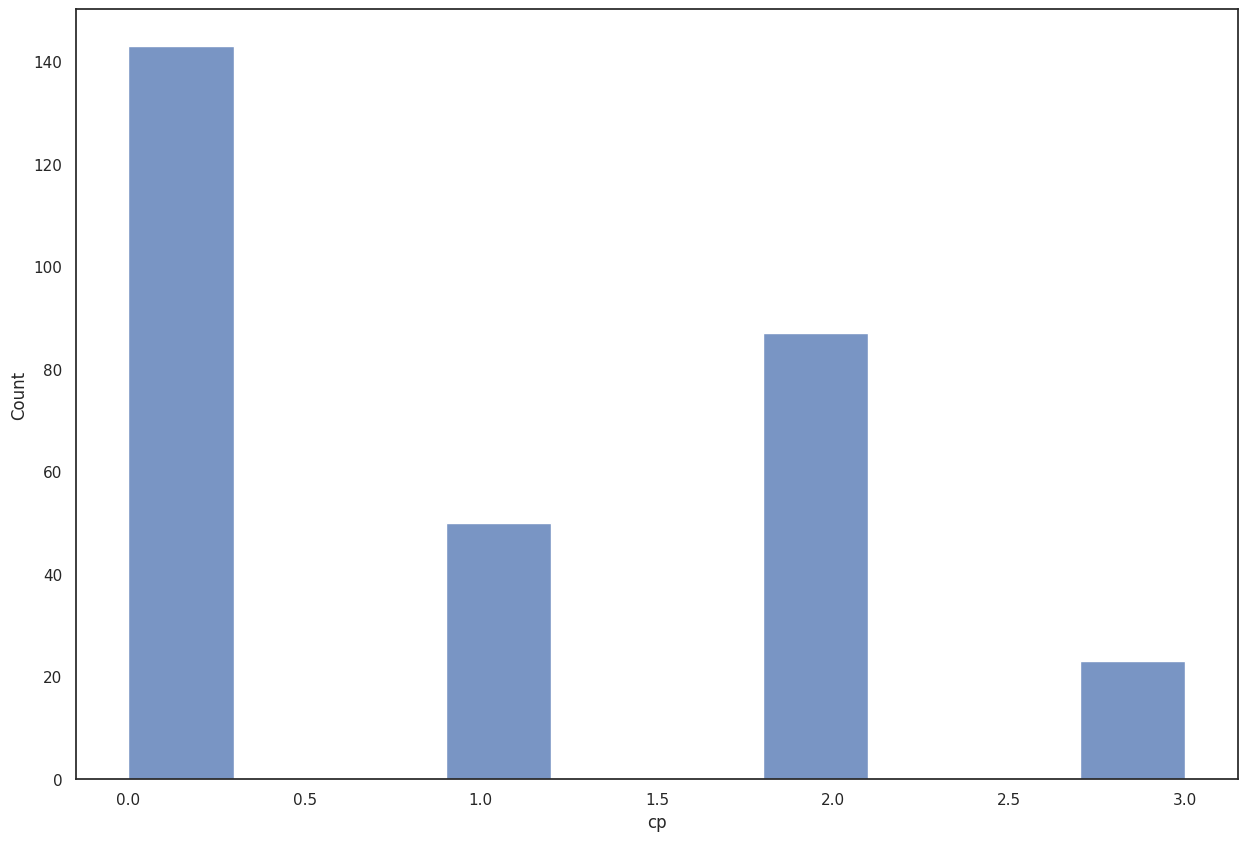

In [ ]:
sns.histplot(data=data, x="cp")

In [ ]:
# sex: categorical variable, 1 = male, 0 = female
data['sex'].unique()

array([1, 0])

In [ ]:
# mode of sex: male
data['sex'].mode()

0    1
Name: sex, dtype: int64

In [ ]:
gb_sex=data.groupby('sex').apply(len)
gb_sex

sex
0     96
1    207
dtype: int64

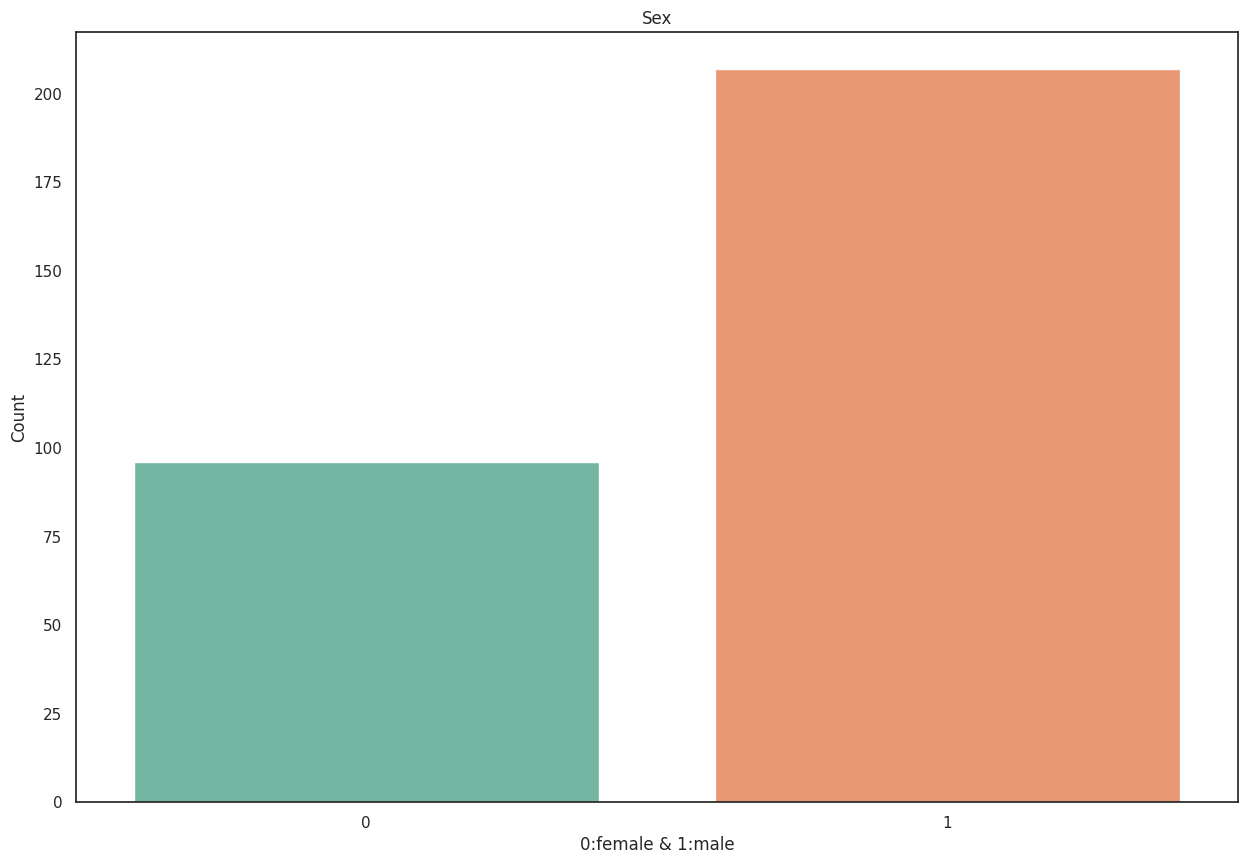

In [ ]:
# create a sample categorical variable with male & female
category= ['0:female', '1:male']
# plot the category counts with different colors for each level
sns.countplot(x=data['sex'], palette="Set2")

# add labels to the plot
plt.title("Sex")
plt.xlabel("0:female & 1:male")
plt.ylabel("Count")

# show the plot
plt.show()

# The majotiry of participants in the study are male

In [ ]:
#trestbps: The person’s resting blood pressure, numerial variable
data['trestbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

In [ ]:
# mode of trestbps: 120 mm Hg (normal BP)
data['trestbps'].mode()

0    120
Name: trestbps, dtype: int64

In [ ]:
data['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [ ]:
# mode of trestbps, resting blood pressure
data['trestbps'].mode()

0    120
Name: trestbps, dtype: int64

In [ ]:
# median of trestbps
data['trestbps'].median()

130.0

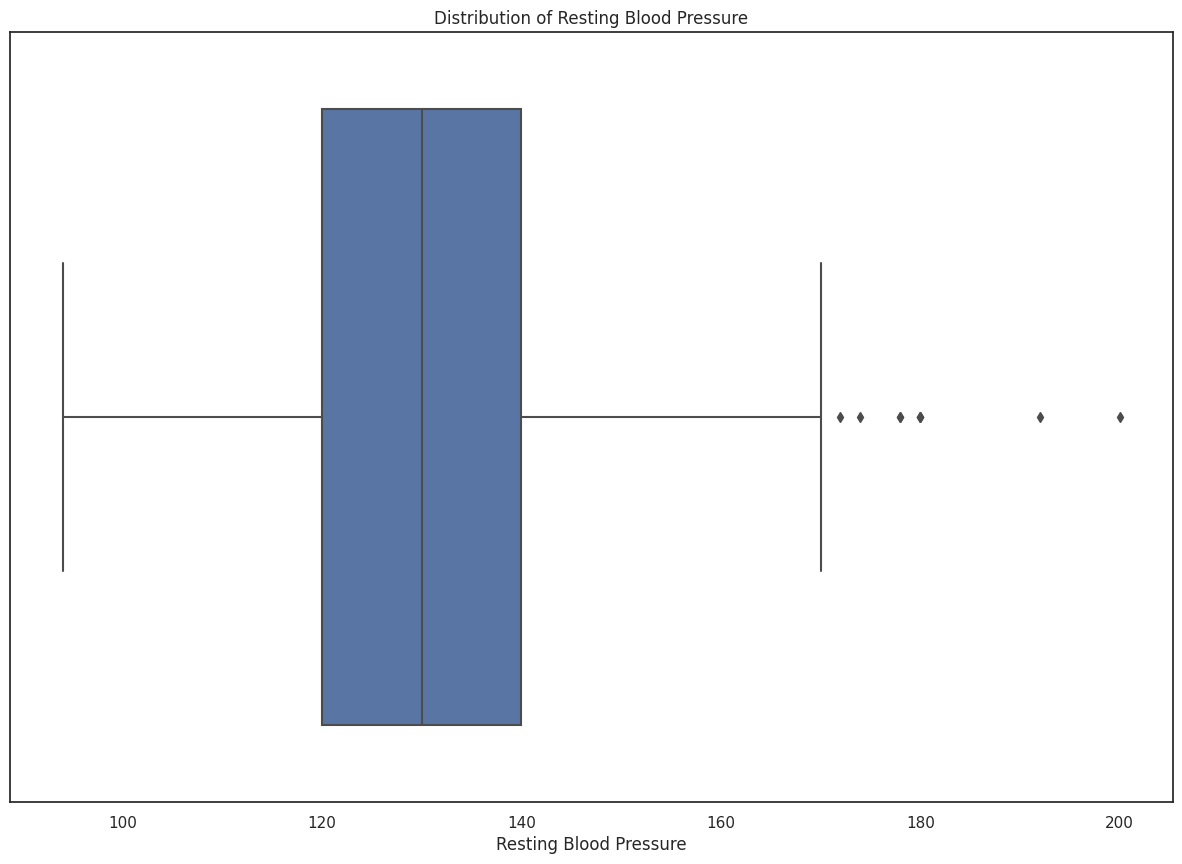

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=data['trestbps'])
plt.title("Distribution of Resting Blood Pressure")
plt.xlabel("Resting Blood Pressure")
plt.show()

<Axes: xlabel='trestbps', ylabel='Count'>

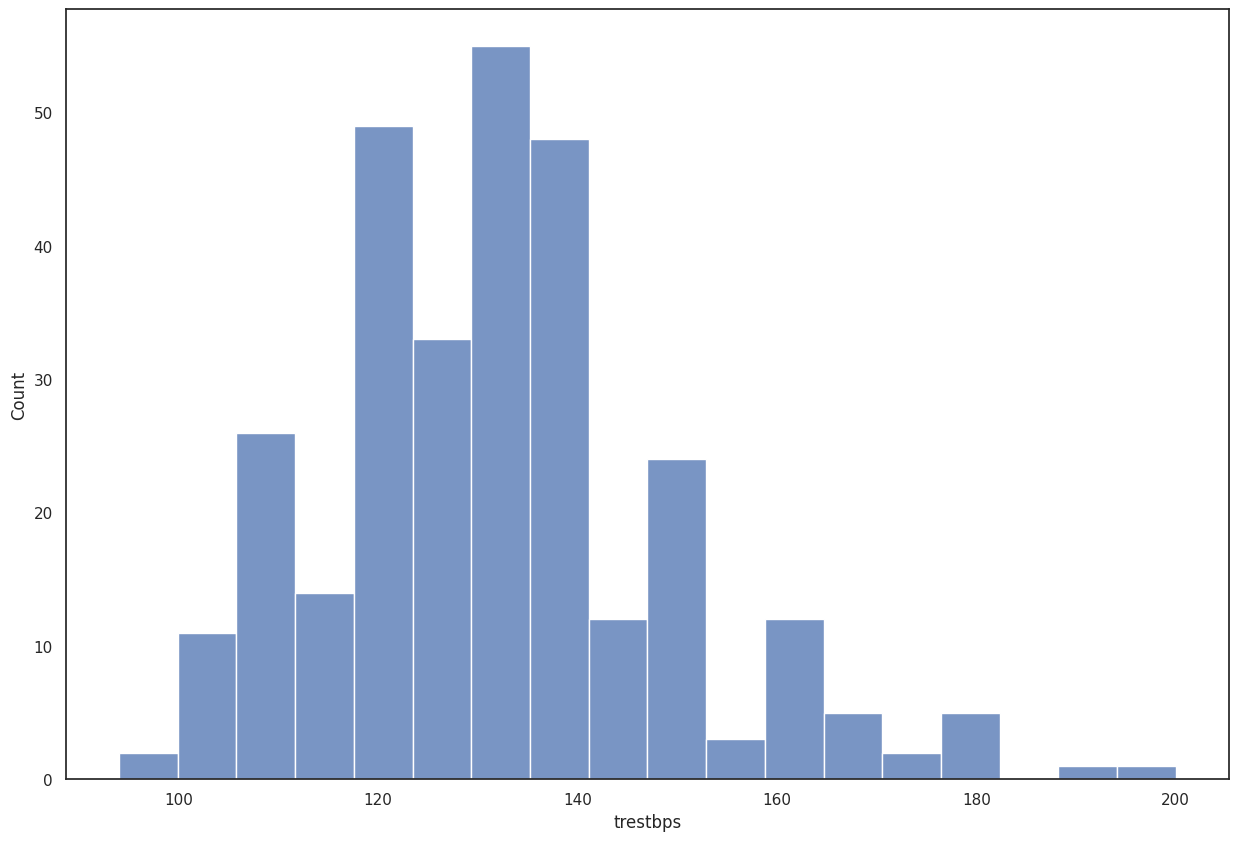

In [ ]:
sns.histplot(data=data, x="trestbps")

<ipython-input-255-f0c45eea3dd7>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['trestbps'], shade=True)


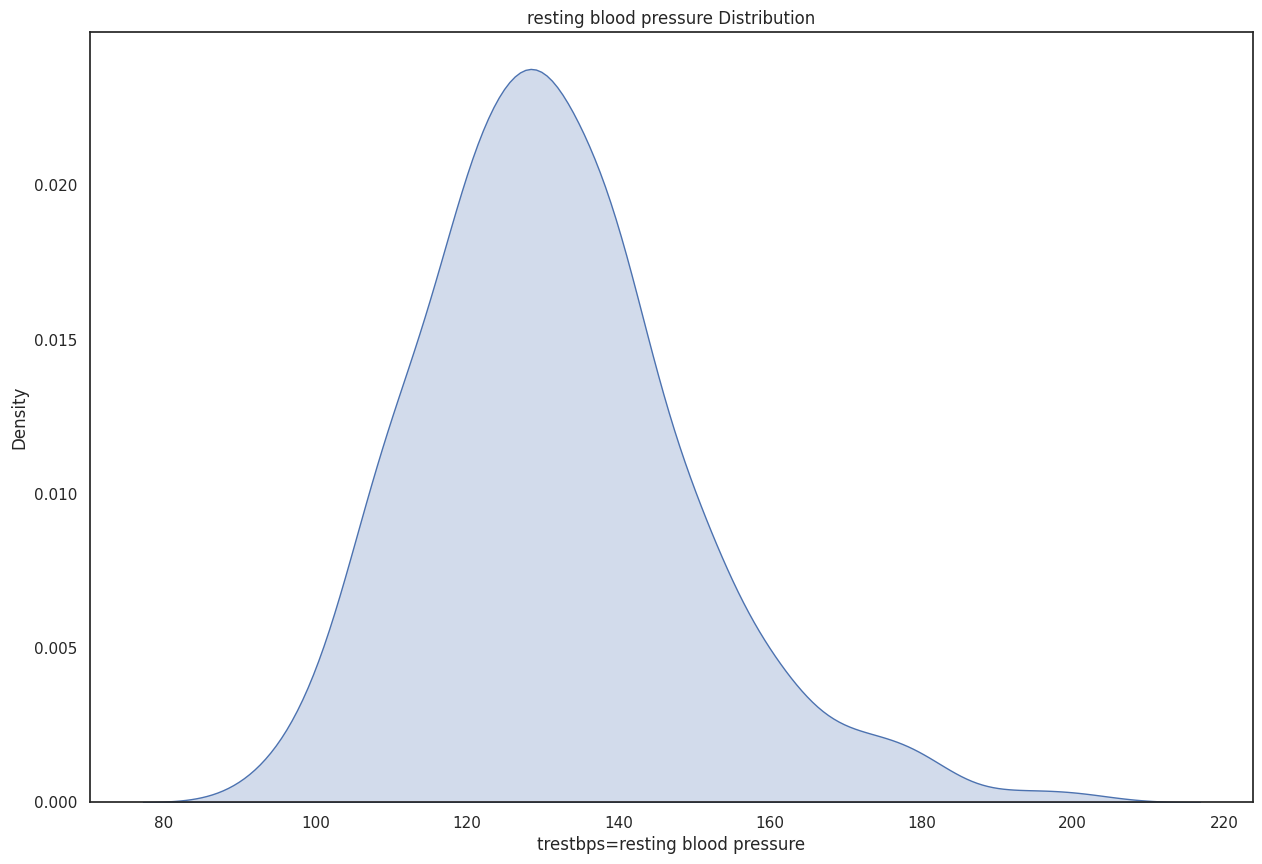

In [ ]:
import seaborn as sns

# plot a kernel density estimate (KDE) distribution of the 'trestbps' variable
sns.kdeplot(data['trestbps'], shade=True)

# set the title and axis labels
plt.title("resting blood pressure Distribution")
plt.xlabel("trestbps=resting blood pressure")
plt.ylabel("Density")

# show the plot
plt.show()

# the plot graph shows outliers above upper tail in "trestbps", resting blood pressure. It's right skewed distribution. There are outliers on the right side.

In [ ]:
def find_outliers():
  Q1_trestbps = np.percentile(data.trestbps,25)
  Q3_trestbps = np.percentile(data.trestbps,75)
  IQR=(Q3_trestbps)-(Q1_trestbps)
  Lower_tail = (Q1_trestbps) - 1.5 * IQR
  Upper_tail = (Q3_trestbps) + 1.5 * IQR
  outliers_trestbps = []
  for i in data.trestbps:
      if i < Lower_tail or i > Upper_tail:
        outliers_trestbps.append(i)
  return outliers_trestbps
outliers_trestbps = find_outliers()

In [ ]:
print(outliers_trestbps)

[172, 178, 180, 180, 200, 174, 192, 178, 180]


In [ ]:
num_outliers_trestbps = len(outliers_trestbps)
num_outliers_trestbps

9

# trestbps, rest blood pressure has 9 outliers

In [ ]:
# chol: The person’s cholesterol measurement in mg/dl, numerial variable,
#Normal: Less than 200 mg/dL. Borderline high: 200 to 239 mg/dL. High: At or above 240 mg/dL.
data['chol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131])

In [ ]:
# mode of chol:
data['chol'].mode()

0    197
1    204
2    234
Name: chol, dtype: int64

In [ ]:
# median of cholesterol
data['chol'].median()

240.0

In [ ]:
data['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

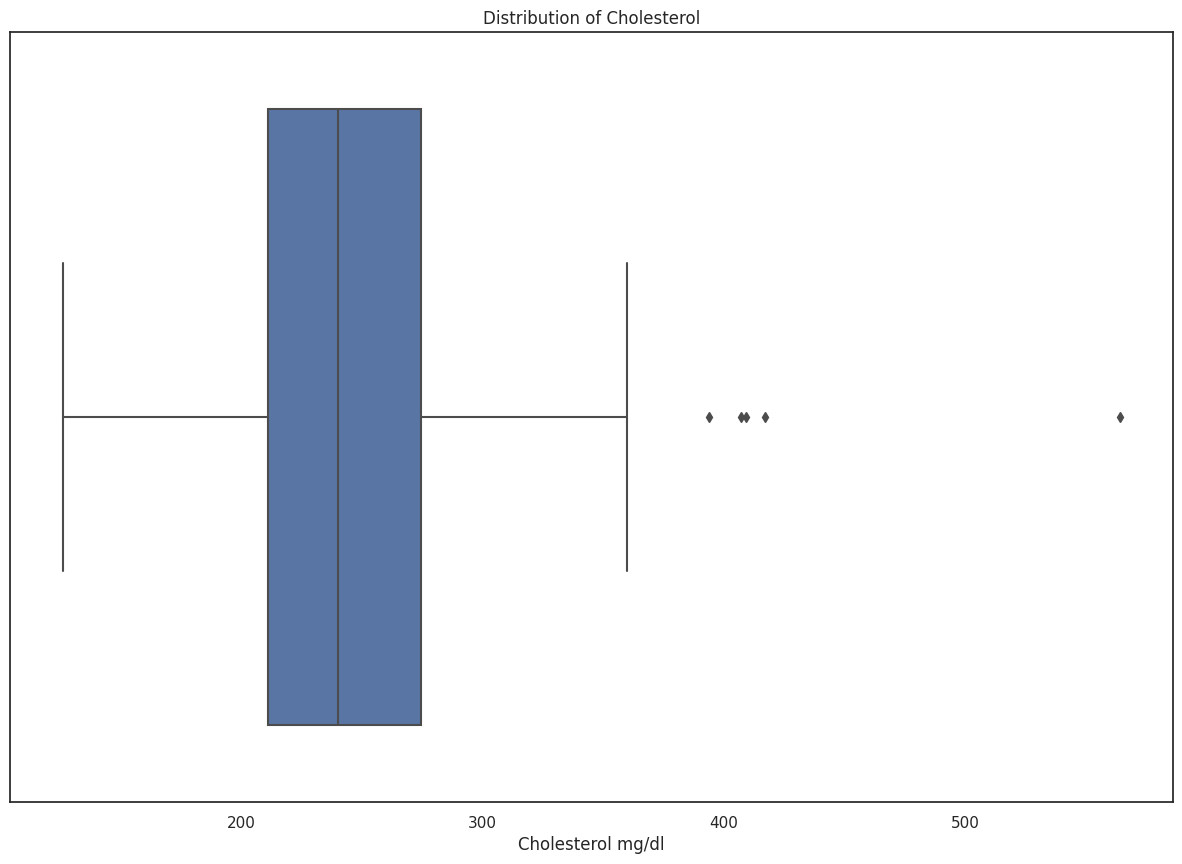

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=data['chol'])
plt.title("Distribution of Cholesterol")
plt.xlabel("Cholesterol mg/dl")
plt.show()

#The plot graph shows outliers on the right above upper tail and it's right skewed distribution

<Axes: xlabel='chol', ylabel='Count'>

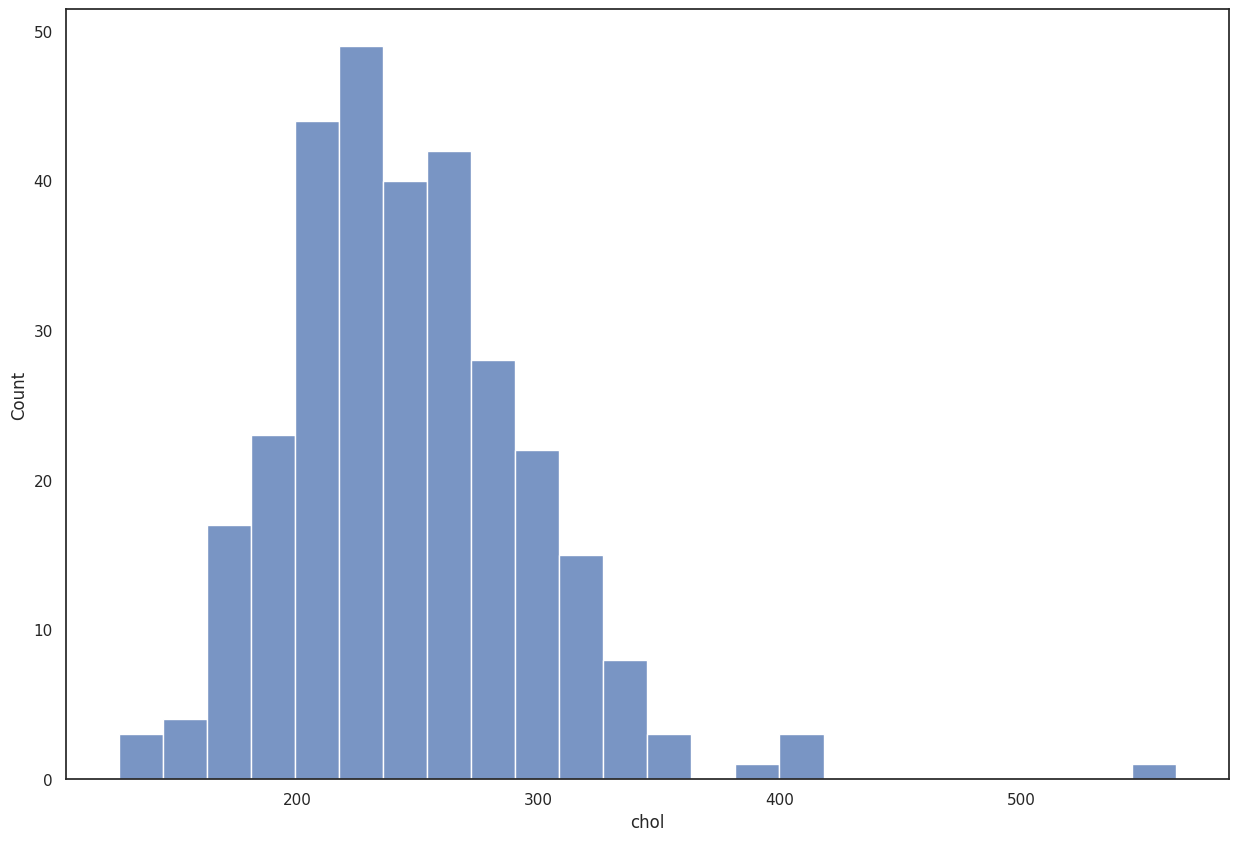

In [ ]:
sns.histplot(data=data, x="chol")

<ipython-input-265-8e88f02092b3>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['chol'], shade=True)


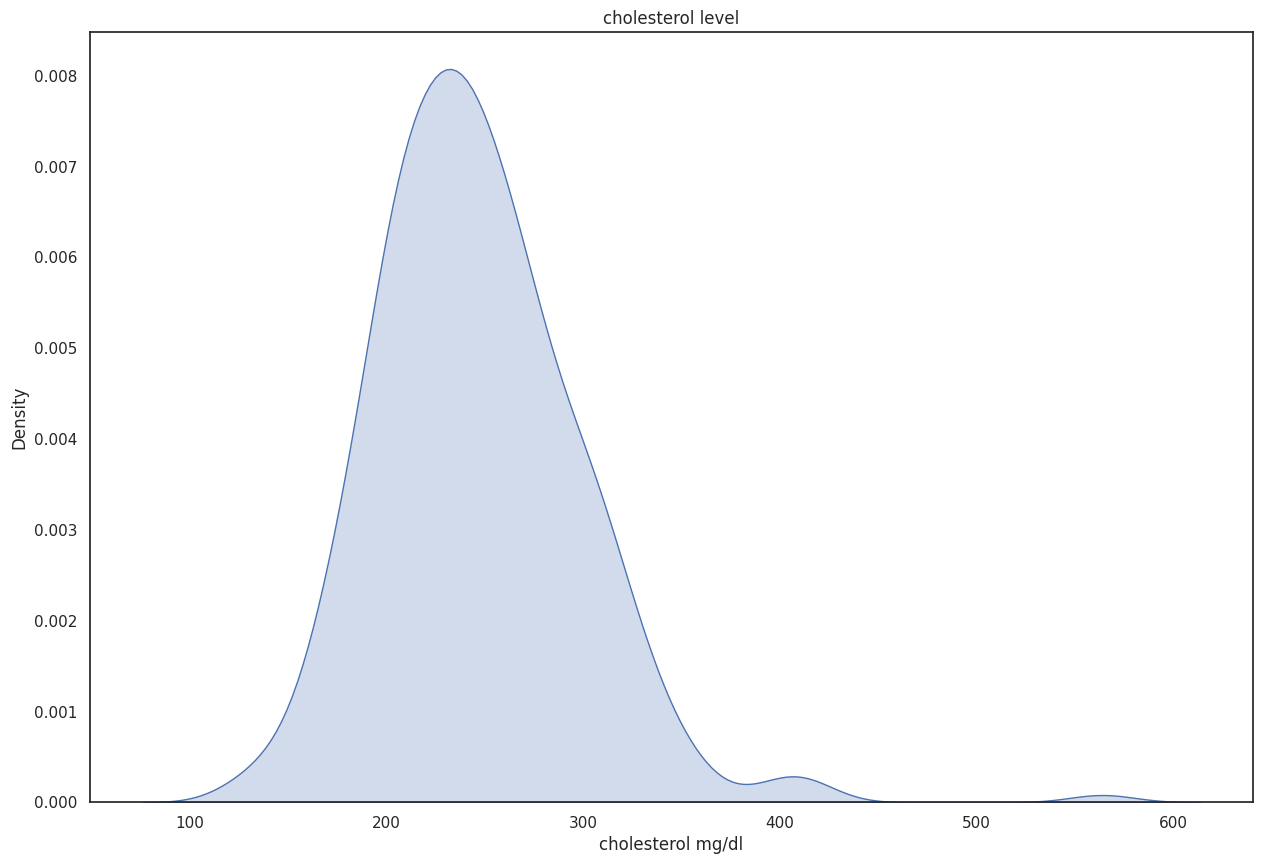

In [ ]:
import seaborn as sns

# plot a kernel density estimate (KDE) distribution of the 'chol' variable
sns.kdeplot(data['chol'], shade=True)

# set the title and axis labels
plt.title("cholesterol level")
plt.xlabel("cholesterol mg/dl")
plt.ylabel("Density")

# show the plot
plt.show()

In [ ]:
def find_outliers():
  Q1_chol = np.percentile(data.chol,25)
  Q3_chol = np.percentile(data.chol,75)
  IQR=(Q3_chol)-(Q1_chol)
  Lower_tail = (Q1_chol) - 1.5 * IQR
  Upper_tail = (Q3_chol) + 1.5 * IQR
  outliers_chol=[]
  for i in data.chol:
      if i < Lower_tail or i > Upper_tail:
        outliers_chol.append(i)
  return outliers_chol
outliers_chol=find_outliers()

In [ ]:
print(outliers_chol)

[417, 564, 394, 407, 409]


In [ ]:
num_outliers_chol = len(outliers_chol)
num_outliers_chol

5

# cholesterol has 5 outliers

In [ ]:
data['fbs'] = data.fbs.replace({1: "True", 0: "False"})

In [ ]:
# fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false), categorical variable
data['fbs'].unique()

array(['True', 'False'], dtype=object)

In [ ]:
# mode of fbs: 0, fast blood sugar <120 mg/dl
data['fbs'].mode()

0    False
Name: fbs, dtype: object

In [ ]:
gb_fbs=data.groupby('fbs').apply(len)
gb_fbs

fbs
False    258
True      45
dtype: int64

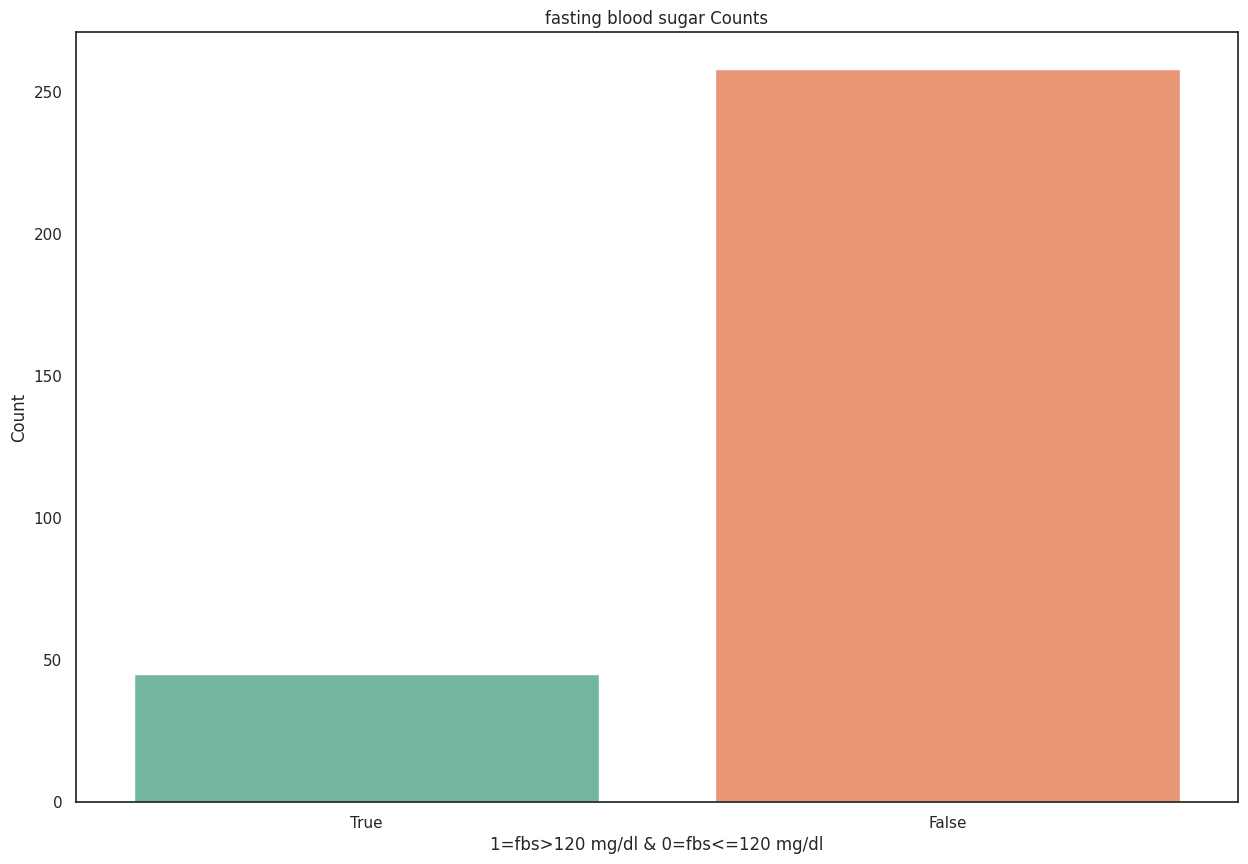

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a sample categorical variable with fbs
#category= ['fbs > 120 mg/dl, 1 = true; 0 = false]
# plot the category counts with different colors for each level
sns.countplot(x=data['fbs'], palette="Set2")

# add labels to the plot
plt.title("fasting blood sugar Counts")
plt.xlabel("1=fbs>120 mg/dl & 0=fbs<=120 mg/dl")
plt.ylabel("Count")

# show the plot
plt.show()

# Majority of the participants' fasting blood sugar <= 120 mg/dl, normal

In [ ]:
#restecg: resting electrocardiographic results, categorical variable
#Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
#Value 1: normal
#Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
data['restecg'].unique()

array([0, 1, 2])

In [ ]:
data['restecg'] = data.restecg.replace({0:"left ventricular hypertrophy",1: "normal", 2: "ST-T wav abnormality"})

In [ ]:
#mode of restecg:1, normal
data['restecg'].mode()

0    normal
Name: restecg, dtype: object

In [ ]:
gb_restecg=data.groupby('restecg').apply(len)
gb_restecg

restecg
ST-T wav abnormality              4
left ventricular hypertrophy    147
normal                          152
dtype: int64

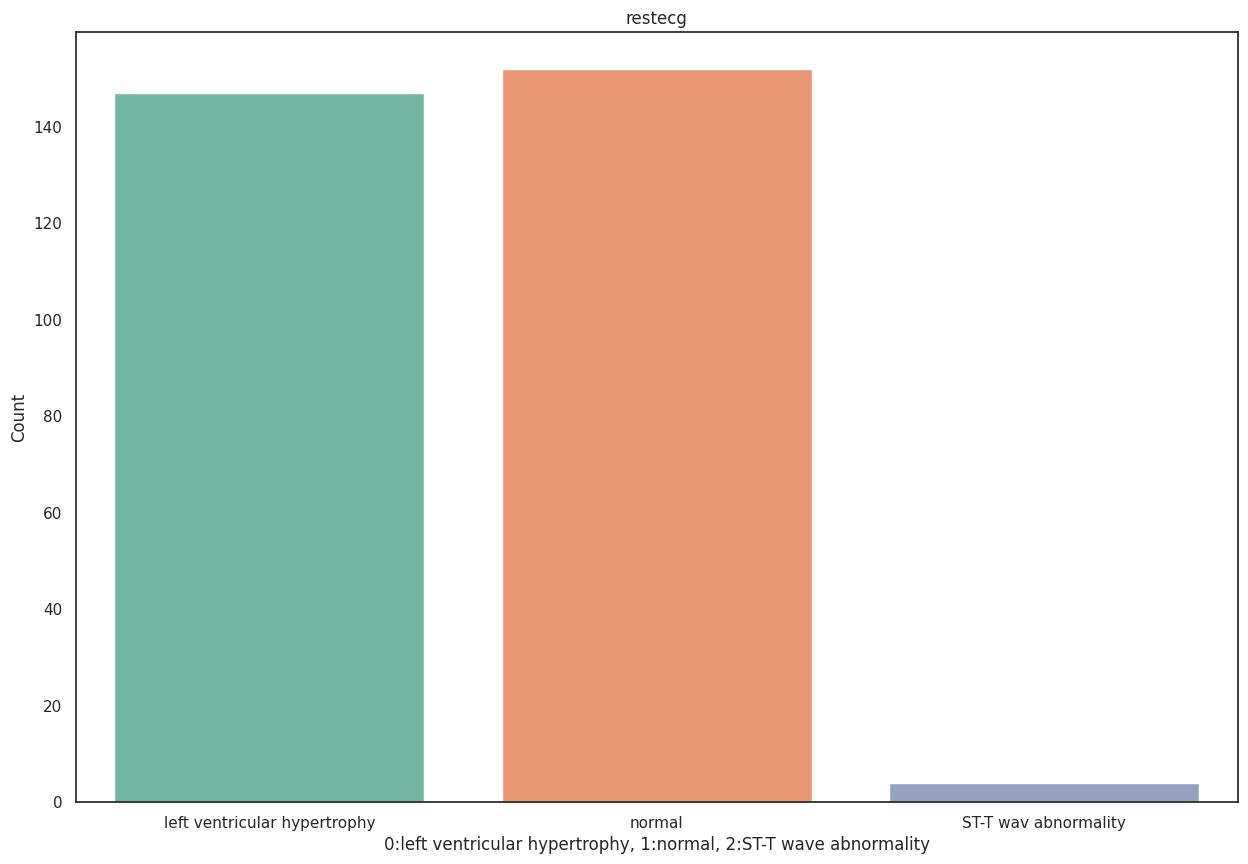

In [ ]:
# create a sample categorical variable with restecg
category= ['0: showing probable or definite left ventricular hypertrophy by Estes’ criteria, 1:normal, 2:aving ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV']
# plot the category counts with different colors for each level
sns.countplot(x=data['restecg'], palette="Set2")

# add labels to the plot
plt.title("restecg")
plt.xlabel("0:left ventricular hypertrophy, 1:normal, 2:ST-T wave abnormality")
plt.ylabel("Count")

# show the plot
plt.show()

# In resting ECG, the majority of participants are normal or left ventricular hypertrophy

In [ ]:
# thalach: The person’s maximum heart rate achieved, numerical variable
data['thalach'].unique()


array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90])

In [ ]:
# mode of thalach: 162 (heart rate)
data['thalach'].mode()

0    162
Name: thalach, dtype: int64

In [ ]:
data['thalach'].median()

153.0

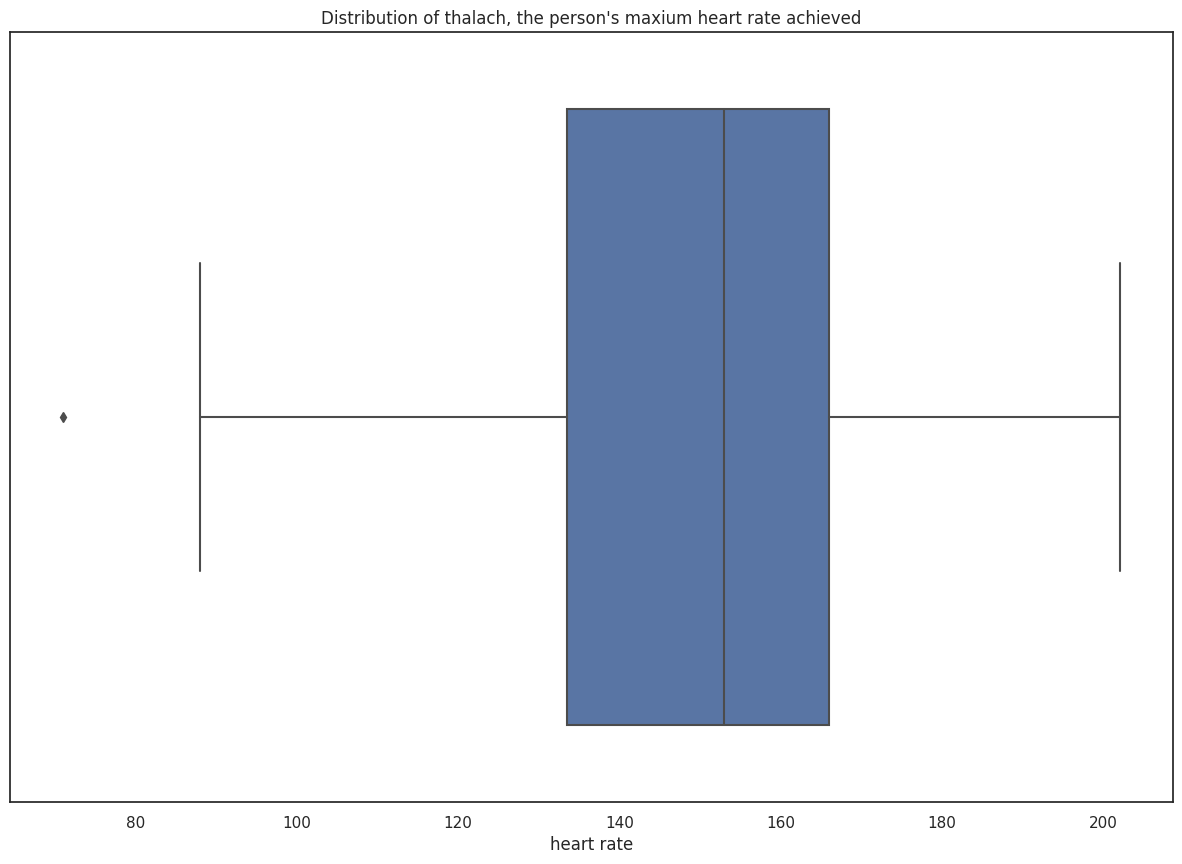

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=data['thalach'])
plt.title("Distribution of thalach, the person's maxium heart rate achieved")
plt.xlabel("heart rate")
plt.show()

<ipython-input-283-7f7273fecacc>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['thalach'], shade=True)


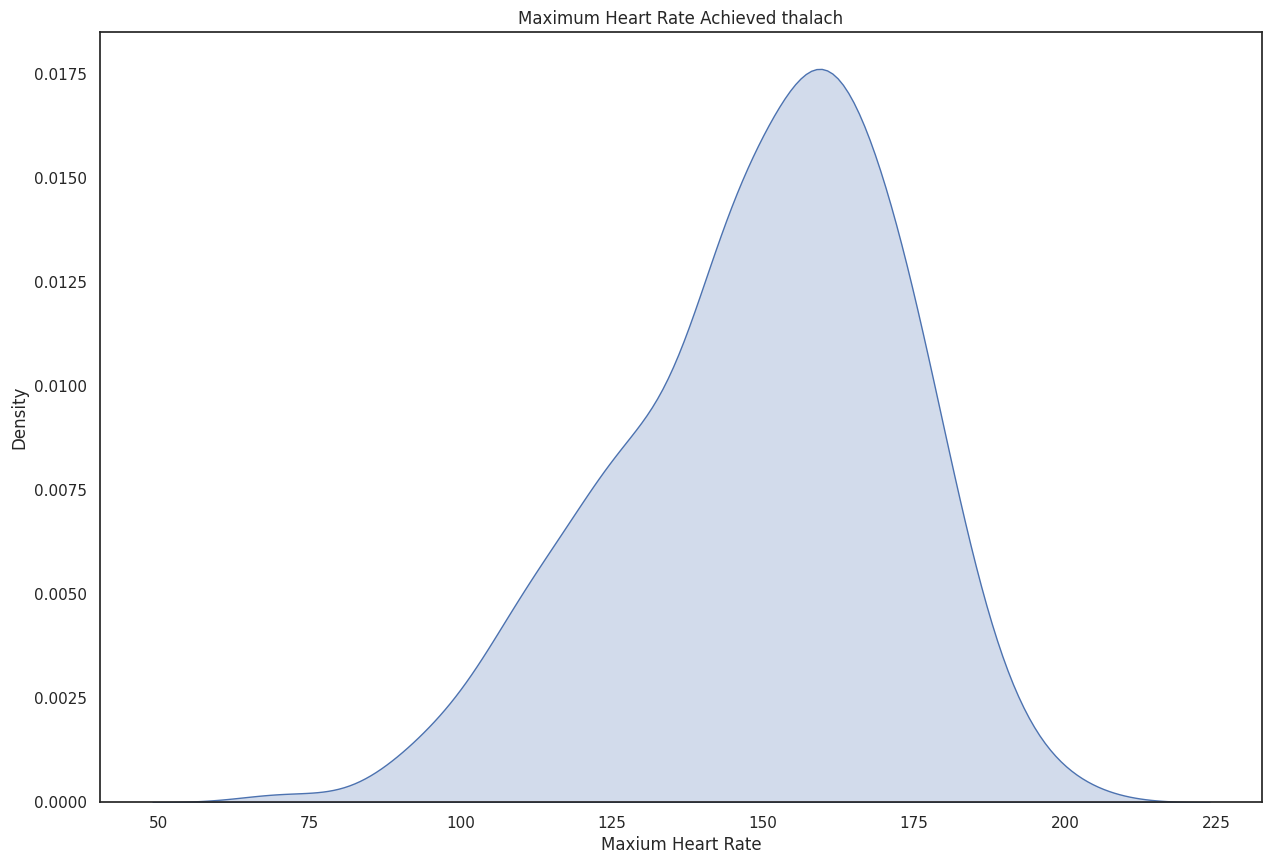

In [ ]:
import seaborn as sns

# plot a kernel density estimate (KDE) distribution of the 'chol' variable
sns.kdeplot(data['thalach'], shade=True)

# set the title and axis labels
plt.title("Maximum Heart Rate Achieved thalach")
plt.xlabel("Maxium Heart Rate")
plt.ylabel("Density")

# show the plot
plt.show()

<Axes: xlabel='thalach', ylabel='Count'>

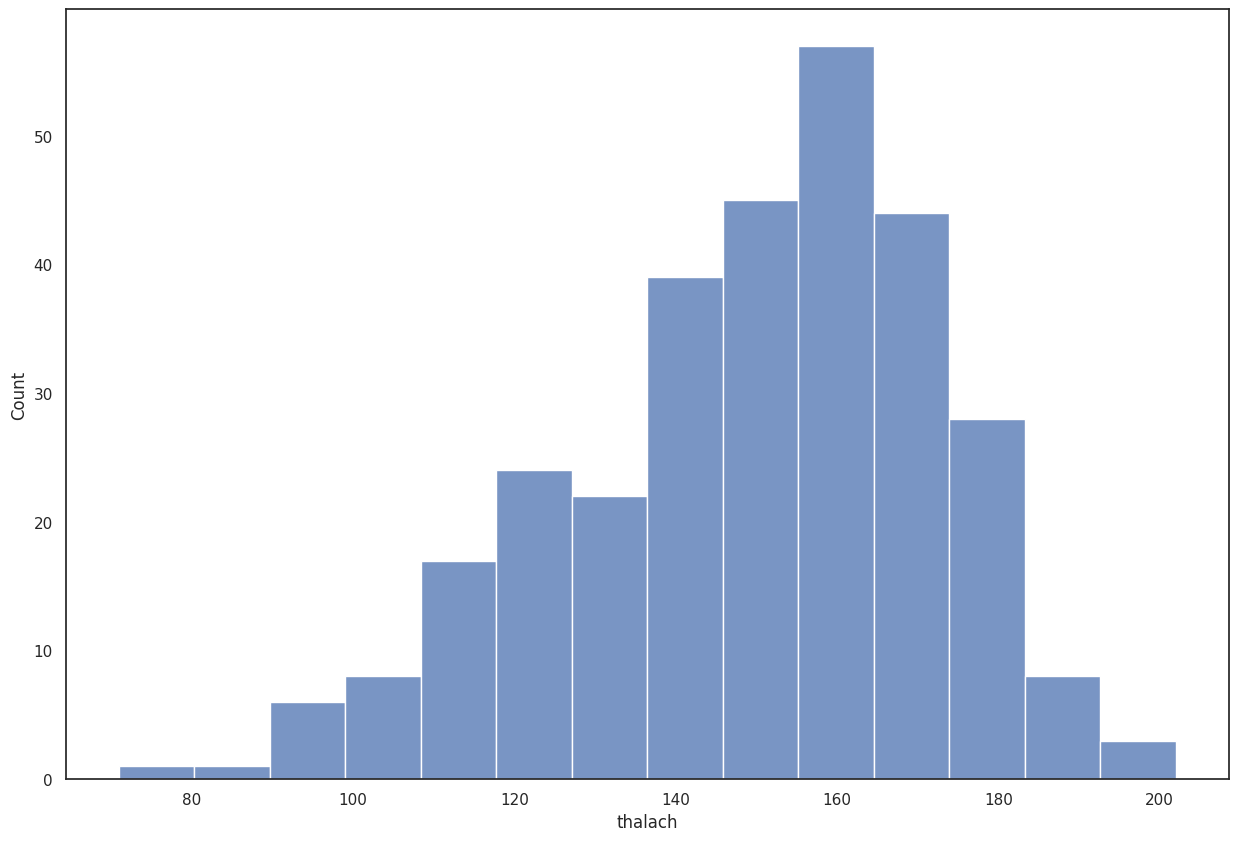

In [ ]:
sns.histplot(data=data, x="thalach")

In [ ]:
# find outliers
def find_outliers():
  Q1_thalach = np.percentile(data.thalach,25)
  Q3_thalach = np.percentile(data.thalach,75)
  IQR=(Q3_thalach)-(Q1_thalach)
  Lower_tail = (Q1_thalach) - 1.5 * IQR
  Upper_tail = (Q3_thalach) + 1.5 * IQR
  outliers_thalach=[]
  for i in data.thalach:
      if i < Lower_tail or i > Upper_tail:
        outliers_thalach.append(i)
  return outliers_thalach
outliers_thalach=find_outliers()


In [ ]:
print(outliers_thalach)

[71]


# "thalach"(the peron's maximum heart rate) has one outlider, 71, on the left side below lower tail in "thalach, maximum heart rate achieved) Left skewed curve

In [ ]:
# exang: Exercise induced angina (1 = yes; 0 = no), categorical variable
data['exang'].unique()


array([0, 1])

In [ ]:
# mode of exang: 0, no exercise induced angina
data['exang'].mode()

0    0
Name: exang, dtype: int64

In [ ]:
gb_exang=data.groupby('exang').apply(len)

In [ ]:
gb_exang

exang
0    204
1     99
dtype: int64

Text(0, 0.5, 'Count')

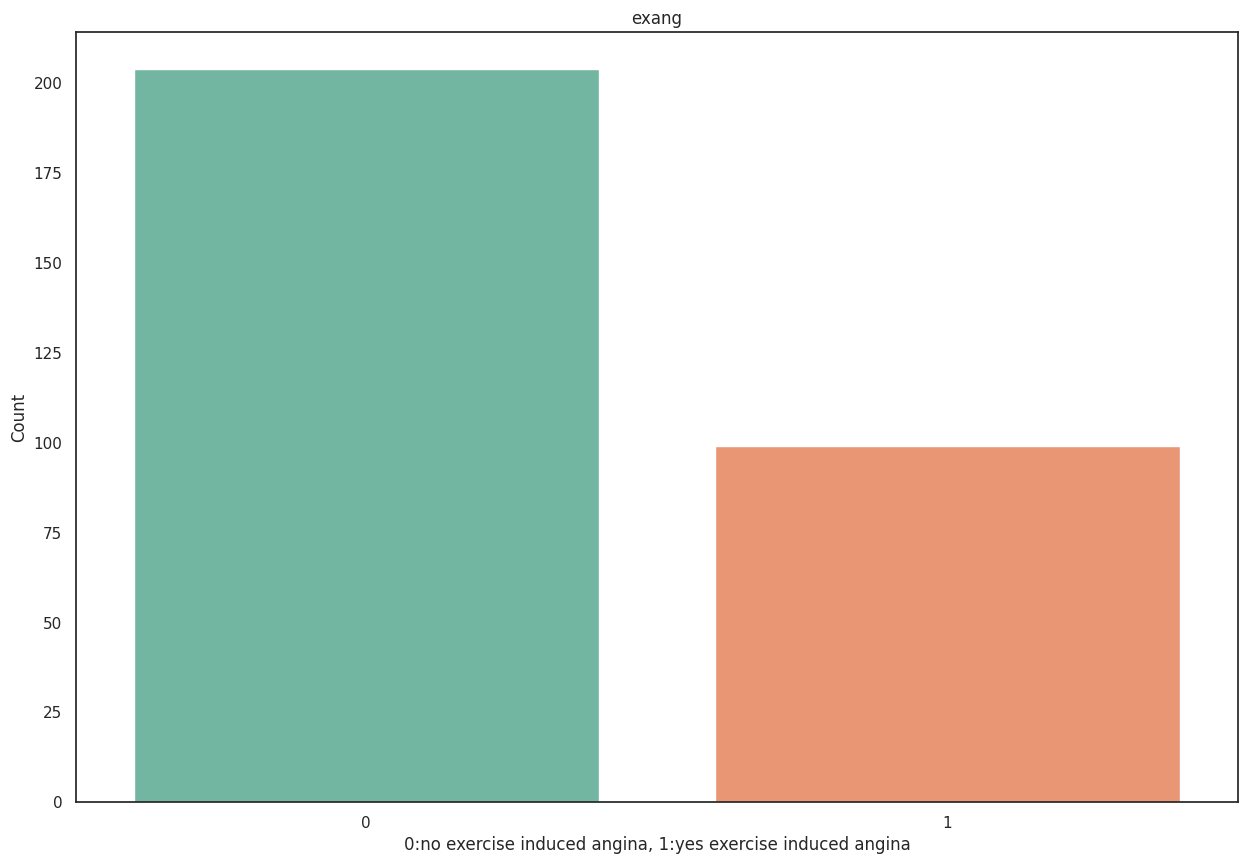

In [ ]:
# create a sample categorical variable with exang
category= ['exercise indeced angina, 0=no,1=yes']
# plot the category counts with different colors for each level
sns.countplot(x=data['exang'], palette="Set2")

# add labels to the plot
plt.title("exang")
plt.xlabel("0:no exercise induced angina, 1:yes exercise induced angina")
plt.ylabel("Count")

# show the plot

# The majority of participants do not have exercise induced angina

In [ ]:
#oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here), numerical variable
data['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [ ]:
data['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

In [ ]:
#mode of oldpeak:0
data['oldpeak'].mode()

0    0.0
Name: oldpeak, dtype: float64

In [ ]:
data['oldpeak'].median()

0.8

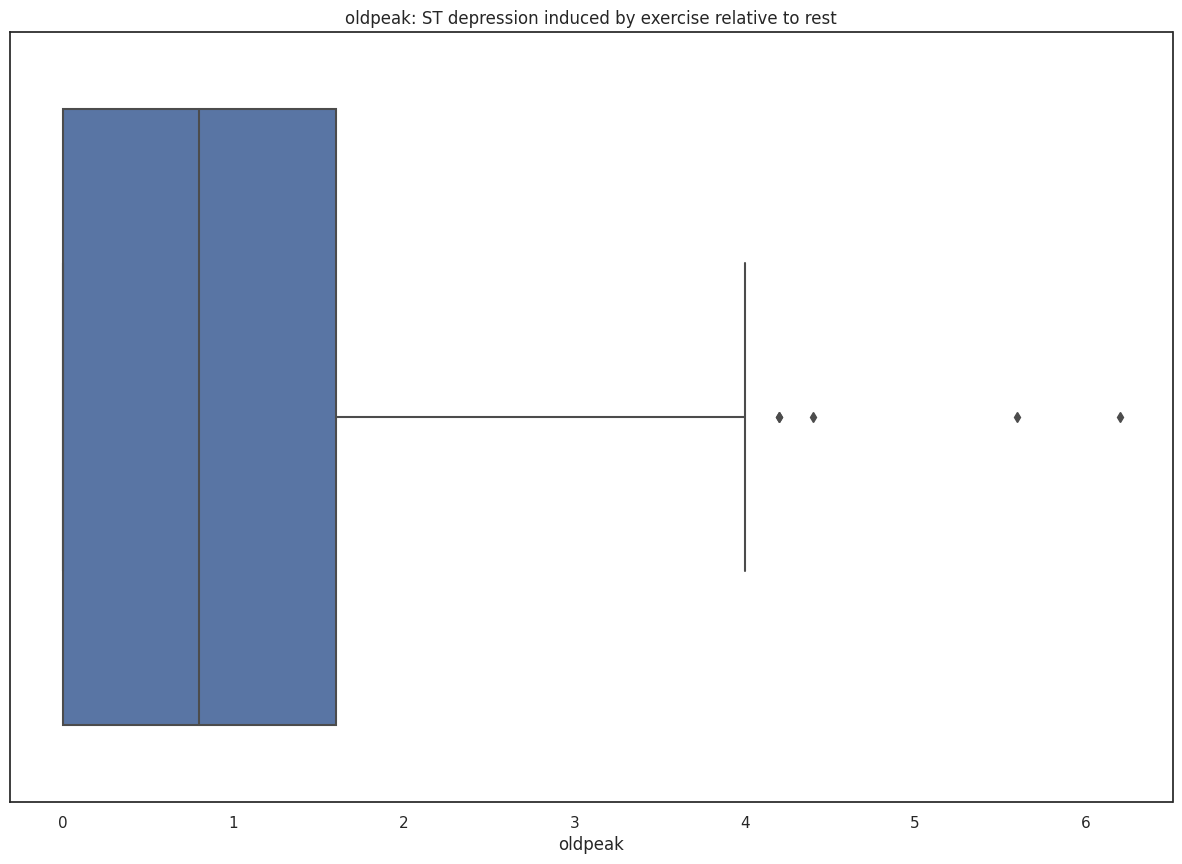

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=data['oldpeak'])
plt.title("oldpeak: ST depression induced by exercise relative to rest")
plt.xlabel("oldpeak")
plt.show()

#the graph shows there are outliers on the right side above upper tail, right-skewed curve

<Axes: xlabel='oldpeak', ylabel='Count'>

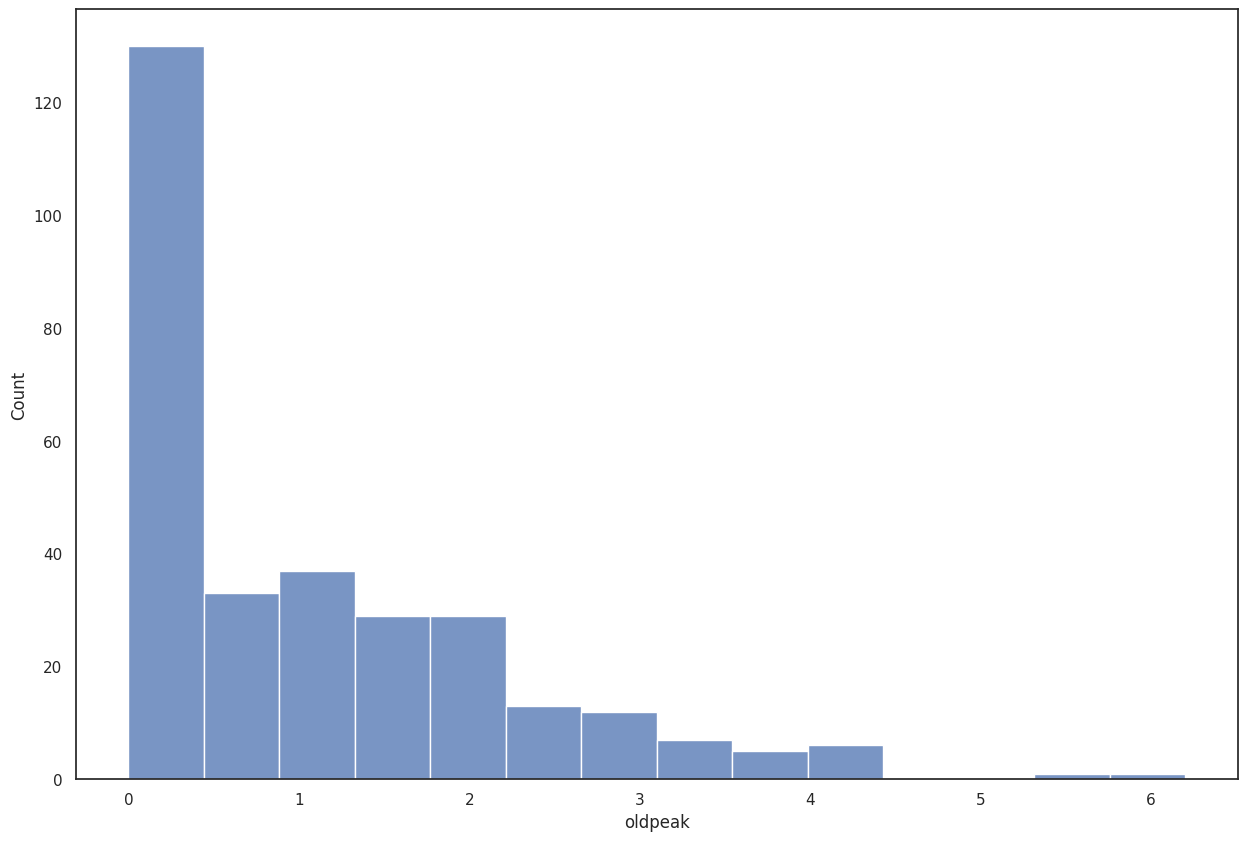

In [ ]:
import seaborn as sns
sns.histplot(data=data,x='oldpeak')


<ipython-input-298-99ac8b1f96f7>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['oldpeak'], shade=True)


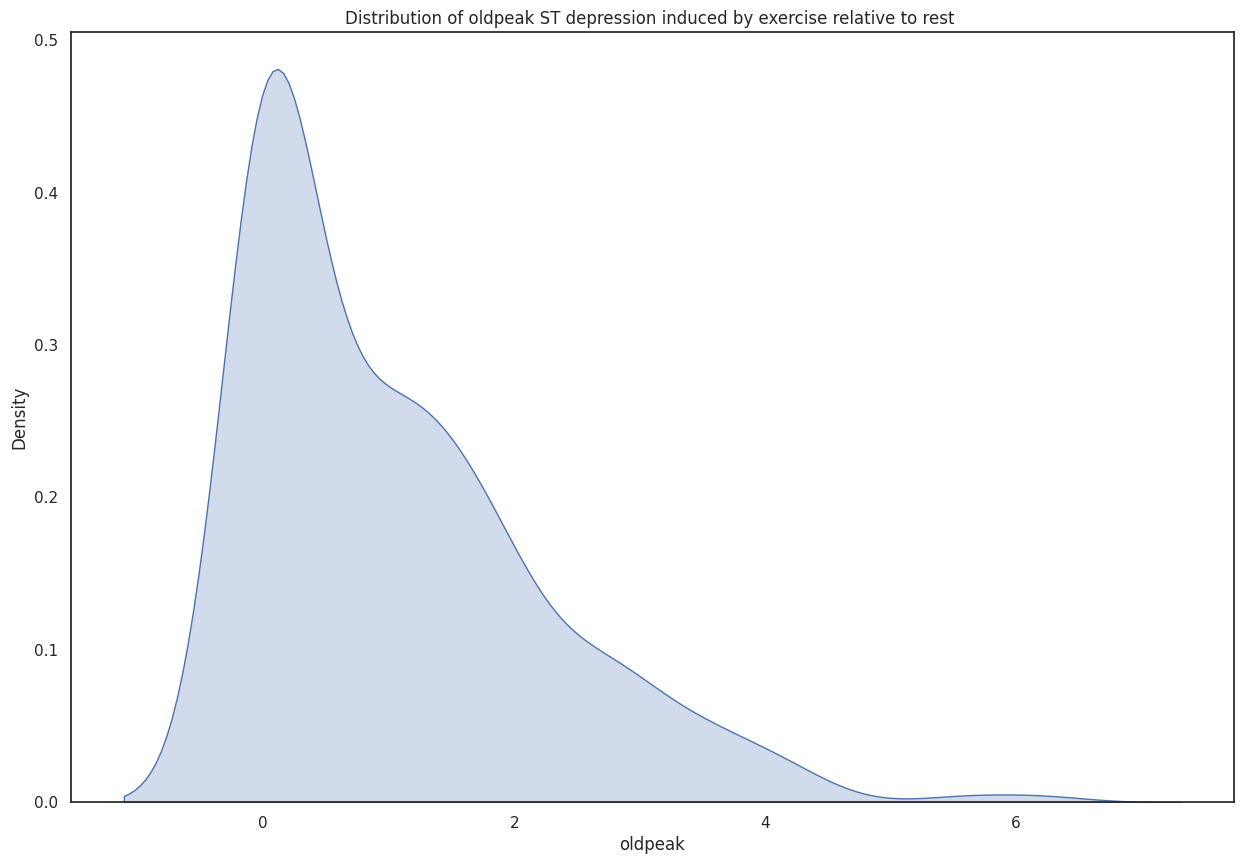

In [ ]:
import seaborn as sns

# plot a kernel density estimate (KDE) distribution of the 'oldpeak' variable
sns.kdeplot(data['oldpeak'], shade=True)

# set the title and axis labels
plt.title("Distribution of oldpeak ST depression induced by exercise relative to rest ")
plt.xlabel("oldpeak")
plt.ylabel("Density")

# show the plot
plt.show()

The distribution graph indicates oldpeak is right skewed, longer tail on the right side

In [ ]:
# find outliers
def find_outliers():
  Q1_oldpeak = np.percentile(data.oldpeak,25)
  Q3_oldpeak = np.percentile(data.oldpeak,75)
  IQR=(Q3_oldpeak)-(Q1_oldpeak)
  Lower_tail = (Q1_oldpeak) - 1.5 * IQR
  Upper_tail = (Q3_oldpeak) + 1.5 * IQR
  outliers_oldpeak=[]
  for i in data.oldpeak:
      if i < Lower_tail or i > Upper_tail:
        outliers_oldpeak.append(i)
  return outliers_oldpeak
outliers_oldpeak=find_outliers()

In [ ]:
print(outliers_oldpeak)

[4.2, 6.2, 5.6, 4.2, 4.4]


# "oldpeak" (ST depression induced by exercise relative to rest), has 5 outliers

In [ ]:
#slope: the slope of the peak exercise ST segment, categorical variable
# 0: downsloping; 1: flat; 2: upsloping
data['slope'].unique()

array([0, 2, 1])

In [ ]:
#mode of slope:2,upsloping
data['slope'].mode()

0    2
Name: slope, dtype: int64

In [ ]:
gb_slope=data.groupby('slope').apply(len)

In [ ]:
gb_slope

slope
0     21
1    140
2    142
dtype: int64

# The majority of participants have downsloping or flat slope of the peak exercise ST segment.

In [ ]:
# target: Heart disease (1 = disease, 0= no disease), categorical variable
data['target'].unique()


array([1, 0])

In [ ]:
# heart disease value count
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
# mode of target: 0heart disease
data['target'].mode()

0    1
Name: target, dtype: int64

# There are more diseased participants than healthier(no disease)

In [ ]:
# Drop outliers
# Define columns that have outliers
outlier_column = ['trestbps','chol','thalach','oldpeak']  # Specify the columns to drop outliers from

# Identify and remove outliers
for column in outlier_column:
    q75, q25 = np.percentile(data.loc[:, column], [75, 25])
    intr_qr = q75 - q25
    max_threshold = q75 + (1.5 * intr_qr)
    min_threshold = q25 - (1.5 * intr_qr)
    data = data.loc[(data[column] >= min_threshold) & (data[column] <= max_threshold)]

In [ ]:
data

age  sex  cp  trestbps  chol    fbs                       restecg  \
0     63    1   3       145   233   True  left ventricular hypertrophy   
1     37    1   2       130   250  False                        normal   
2     41    0   1       130   204  False  left ventricular hypertrophy   
3     56    1   1       120   236  False                        normal   
4     57    0   0       120   354  False                        normal   
..   ...  ...  ..       ...   ...    ...                           ...   
298   57    0   0       140   241  False                        normal   
299   45    1   3       110   264  False                        normal   
300   68    1   0       144   193   True                        normal   
301   57    1   0       130   131  False                        normal   
302   57    0   1       130   236  False  left ventricular hypertrophy   

     thalach  exang  oldpeak  slope   ca  thal  target  
0        150      0      2.3      0  0.0   1.0       1  
1        187      0      3.5      0  0.0   2.0       1  
2        172      0      1.4      2  0.0   2.0       1  
3        178      0      0.8      2  0.0   2.0       1  
4        163      1      0.6      2  0.0   2.0       1  
..       ...    ...      ...    ...  ...   ...     ...  
298      123      1      0.2      1  0.0   3.0       0  
299      132      0      1.2      1  0.0   3.0       0  
300      141      0      3.4      1  2.0   3.0       0  
301      115      1      1.2      1  1.0   3.0       0  
302      174      0      0.0      1  1.0   2.0       0  

[284 rows x 14 columns]

In [ ]:
# distribution and relationship
data.target.value_counts()

1    159
0    125
Name: target, dtype: int64

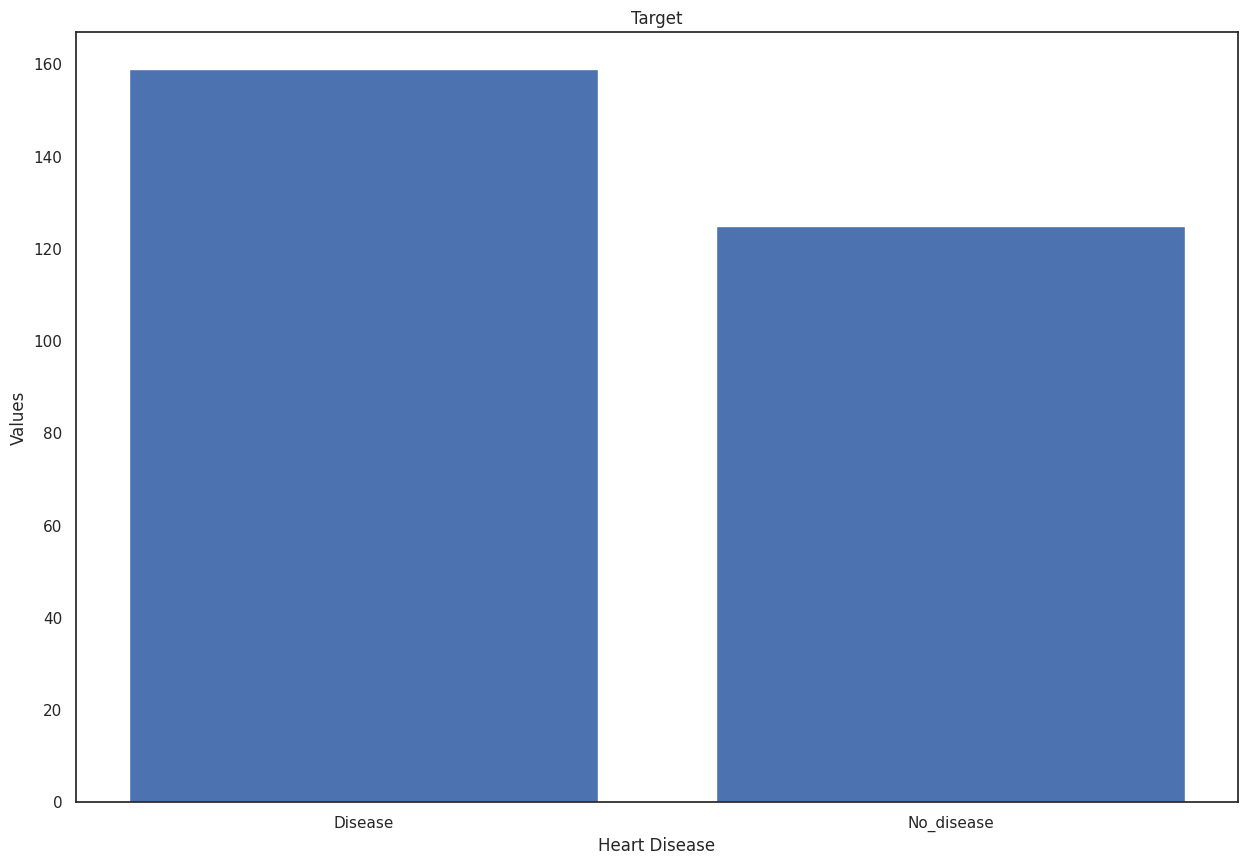

In [ ]:
import matplotlib.pyplot as plt
# Data
x = ['Disease','No_disease']
y = [159,125]
# Create bar chart
plt.bar(x, y)

# Add labels and title
plt.xlabel('Heart Disease')
plt.ylabel('Values')
plt.title('Target')

# Display the chart
plt.show()

There are more diseased than healthier participants

In [ ]:
# age distribution
data['age'].describe()

count    284.000000
mean      53.992958
std        9.161678
min       29.000000
25%       46.750000
50%       55.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

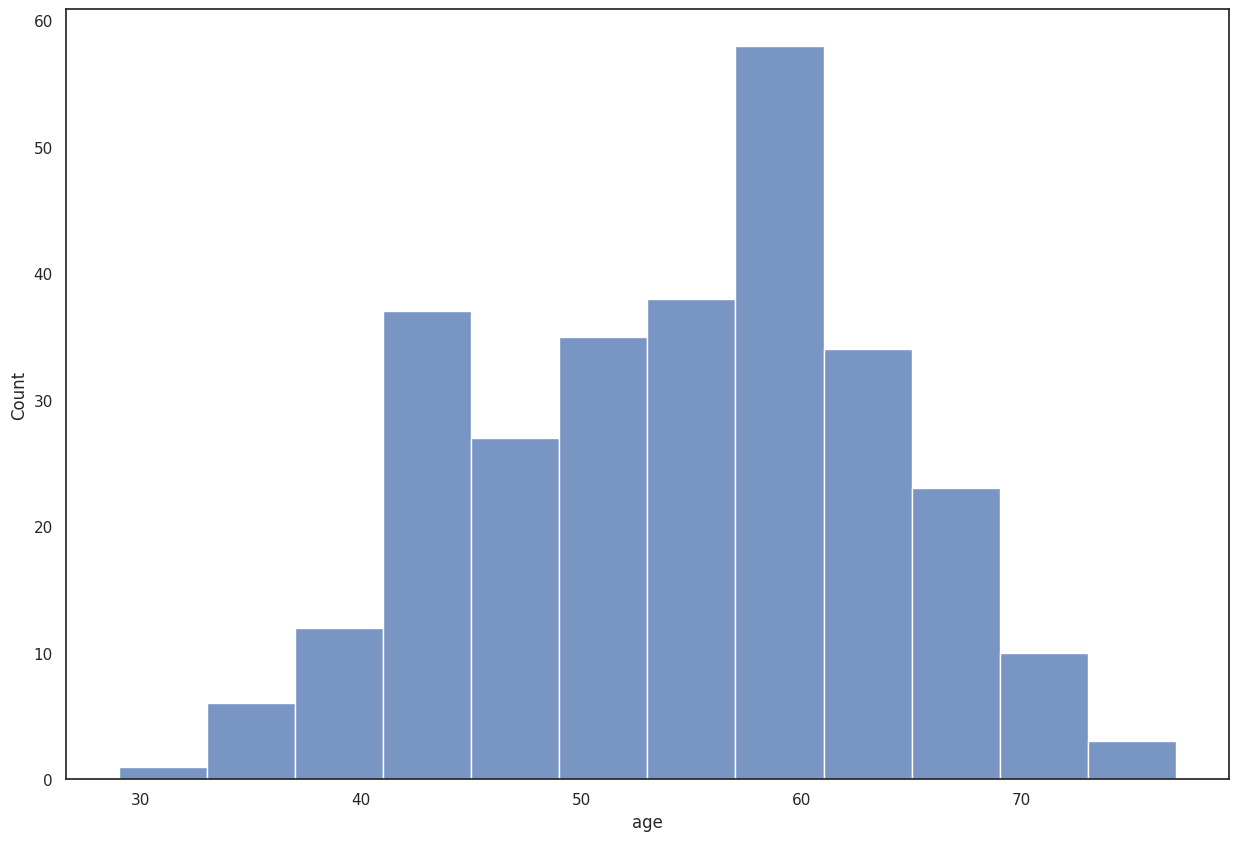

In [ ]:
sns.histplot(data=data, x="age")

Age among participants seems normally distributed, youngest 29 yrs, oldest 77 yrs

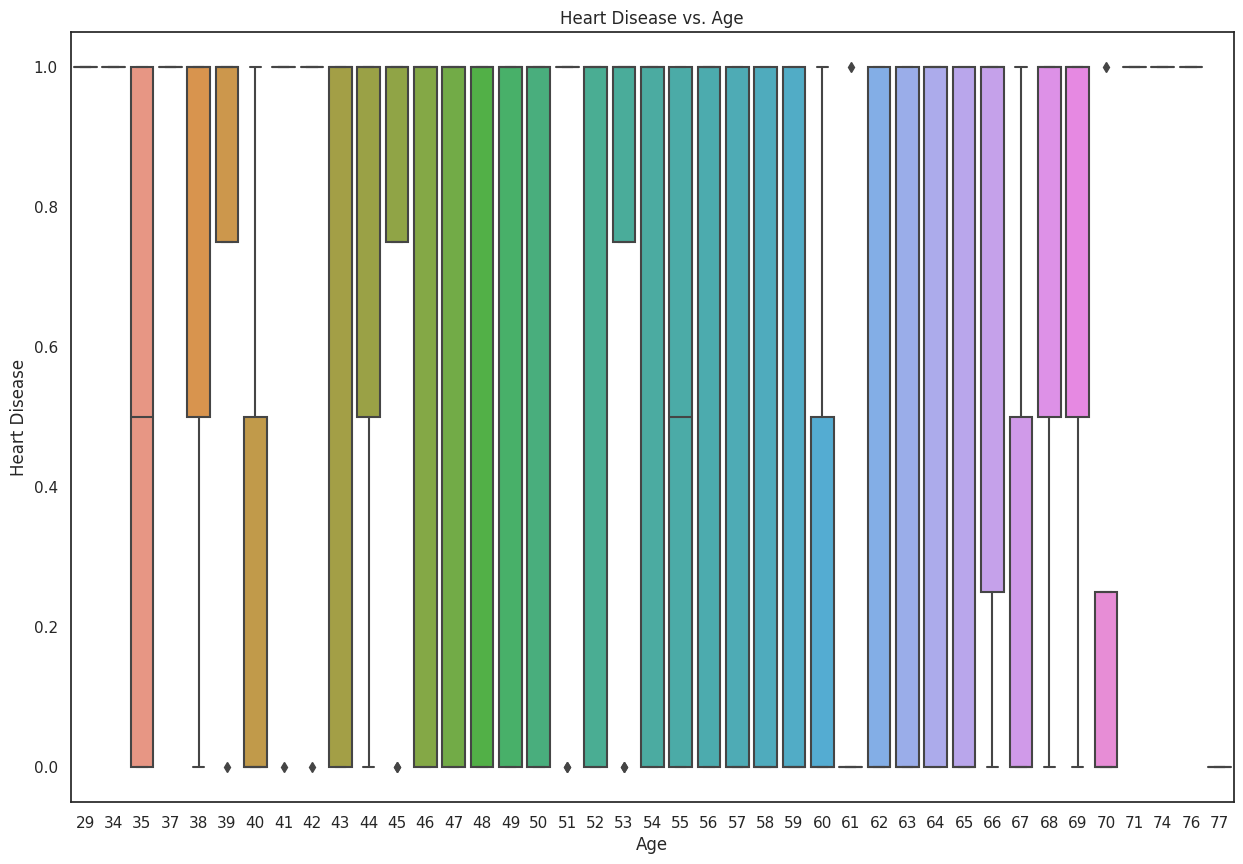

In [ ]:
# Heart disease vs. age distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['age'], y=data['target'])
plt.title("Heart Disease vs. Age")
plt.xlabel("Age")
plt.ylabel("Heart Disease")
plt.show()

The diseased participants are more left-skewed than the healthier
The age of diseased tendss to be younger than the healthier in general

In [ ]:
data.groupby(['sex', 'target']).size()

sex  target
0    0          17
     1          68
1    0         108
     1          91
dtype: int64

In [ ]:
# calculate counts of each category
counts = data.groupby(['sex', 'target']).size().reset_index(name='count')
counts

sex  target  count
0    0       0     17
1    0       1     68
2    1       0    108
3    1       1     91

In [ ]:
# convert count to percentage in the sex-target data
counts = counts.assign(percentage=counts['count'] / counts['count'].sum() * 100)
counts

sex  target  count  percentage
0    0       0     17    5.985915
1    0       1     68   23.943662
2    1       0    108   38.028169
3    1       1     91   32.042254

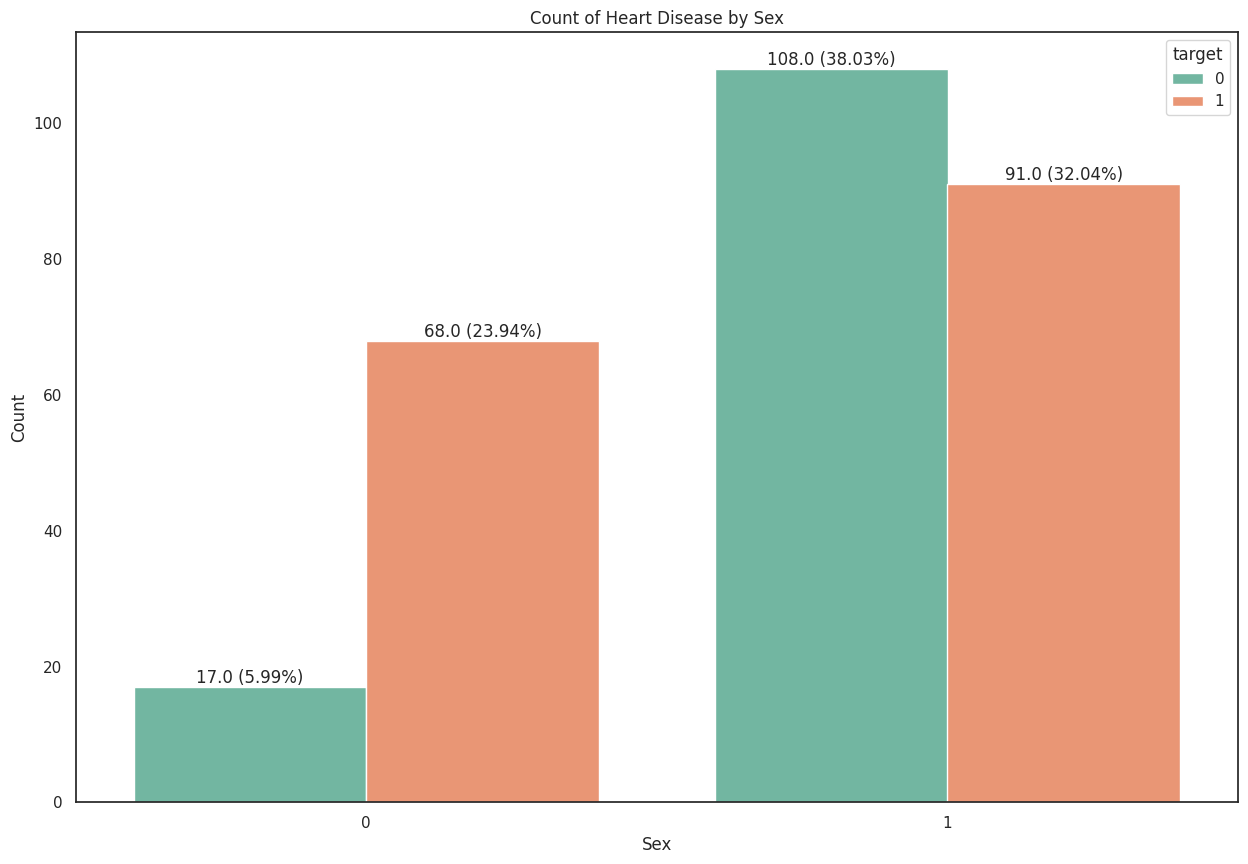

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create countplot
ax = sns.countplot(x='sex', hue='target', data=data, palette='Set2')

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Heart Disease by Sex')

# Calculate total count for each category
total_counts = data.groupby(['sex', 'target']).size()

# Add value and percentage labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height} ({height/total_counts.sum()*100:.2f}%)', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

# Show the plot
plt.show()

the distribution of sex vs. target(heart disesse) in this study implies that males are healthier than diseased in its sex group, while females are more diseased than healthy within its group. Overall, this study recruits a lot more males than females, which males take up to 70% of the total participants. In the male group, number of diseased and healthy males are close. However, in the femal group, the female participants are more diseased about 80% than the healthy.

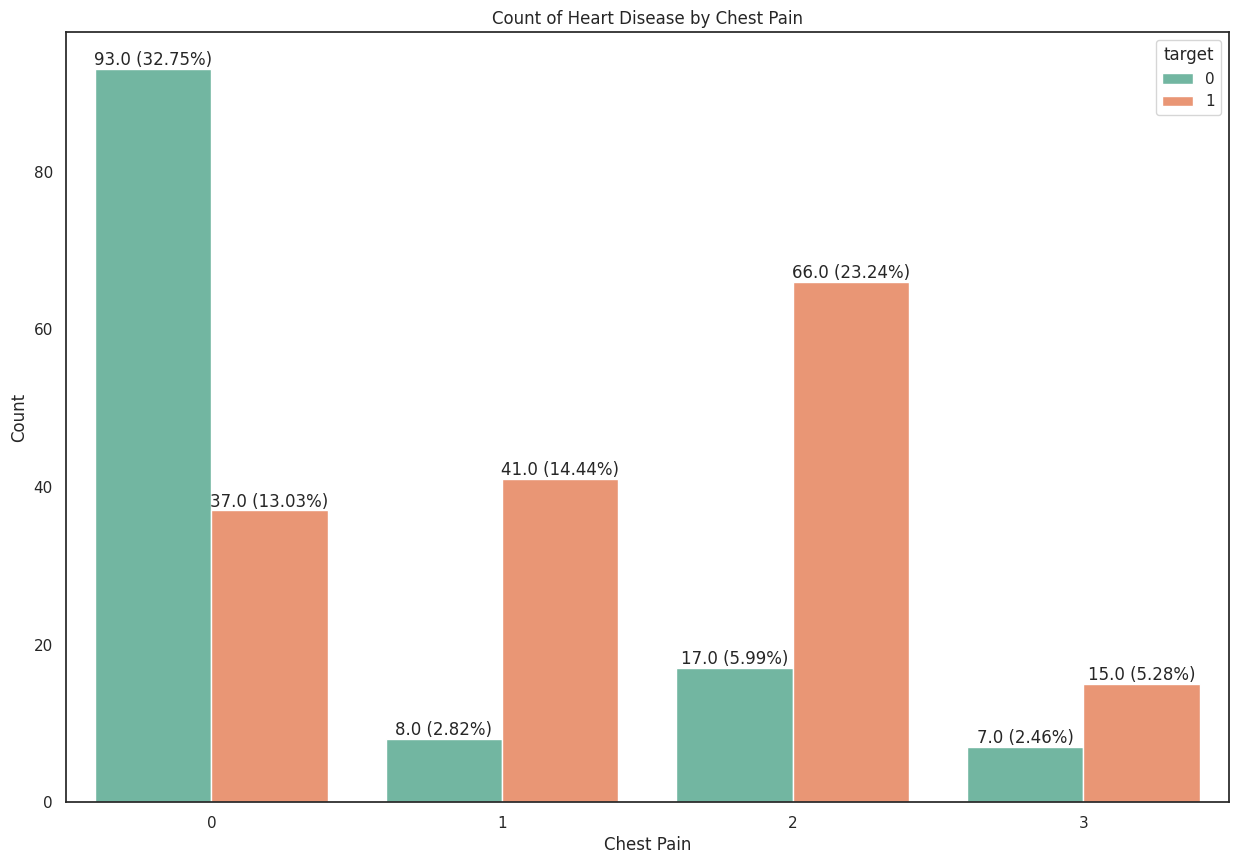

In [ ]:
# Chest pain distribution according to target variable
import seaborn as sns
import matplotlib.pyplot as plt

# Create countplot
ax = sns.countplot(x='cp', hue='target', data=data, palette='Set2')

# Add labels and title
plt.xlabel('Chest Pain')
plt.ylabel('Count')
plt.title('Count of Heart Disease by Chest Pain')

# Calculate total count for each category
total_counts = data.groupby(['cp', 'target']).size()

# Add value and percentage labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height} ({height/total_counts.sum()*100:.2f}%)', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

# Show the plot
plt.show()

In the above graph, it seems that the healthy people who does not have heart disease have typical angina. Angina can be caused by other reason such as stress and exercise. Rather, the less-angina related groups, including asymptomatic, non-angina pain and atypical angina, report having heart disease more than no disease.

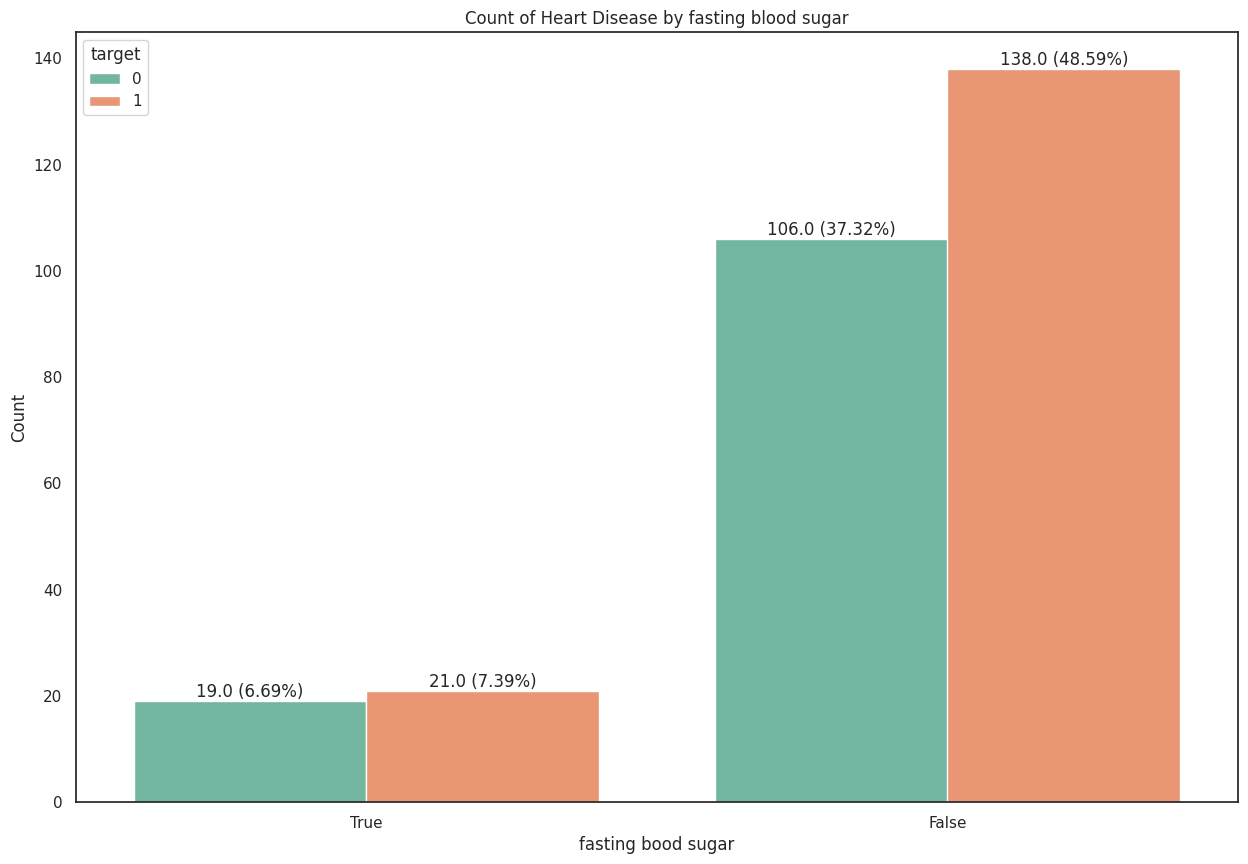

In [ ]:
# Fasting blood sugar distribution according to target variable
# fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes]
import seaborn as sns
import matplotlib.pyplot as plt

# Create countplot
ax = sns.countplot(x='fbs', hue='target', data=data, palette='Set2')

# Add labels and title
plt.xlabel('fasting bood sugar')
plt.ylabel('Count')
plt.title('Count of Heart Disease by fasting blood sugar')

# Calculate total count for each category
total_counts = data.groupby(['fbs', 'target']).size()

# Add value and percentage labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height} ({height/total_counts.sum()*100:.2f}%)', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

# Show the plot
plt.show()

The majotiry of participatns in the study have normal fasting blood sugar(fbs<=120 mg/dl)
However, participants who have normal fasting blood sugar are less healthy, as there are more diseased persons than healthy in the "normal fasting blood sugar" group. But for the participats who have higher fasting blood sugar, there is little difference between the diseased and no heart diseased subgroups. Hereby, a good or elevated fasting blood sugar is not a clear factor/index to predict the heart disease as fbs and heart disease do not have a direct relationship.

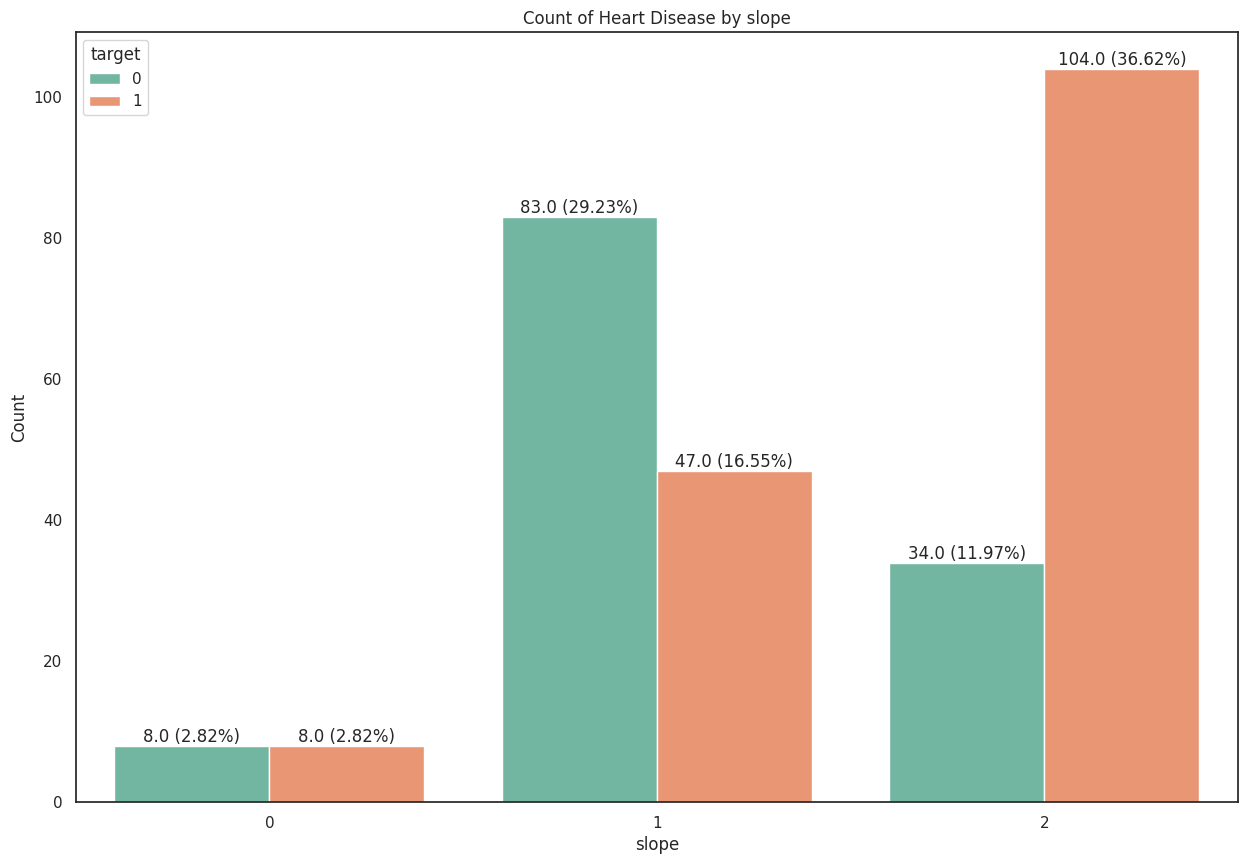

In [ ]:
# Slope distribution according to target variable
# slope (the slope of the peak exercise ST segment): [0: downsloping; 1: flat; 2: upsloping]
import seaborn as sns
import matplotlib.pyplot as plt

# Create countplot
ax = sns.countplot(x='slope', hue='target', data=data, palette='Set2')

# Add labels and title
plt.xlabel('slope')
plt.ylabel('Count')
plt.title('Count of Heart Disease by slope')

# Calculate total count for each category
total_counts = data.groupby(['slope', 'target']).size()

# Add value and percentage labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height} ({height/total_counts.sum()*100:.2f}%)', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

# Show the plot
plt.show()


The heart disease seems related to the downssloping during exercise positively. flat slope has more healthier people that the diseased. No difference in the upsloping group. In general, a slight upslope or horizontal (flat) ST segment during exercise is considered a normal response,commonly observed in healthy individuals with no underlying cardiac conditions:

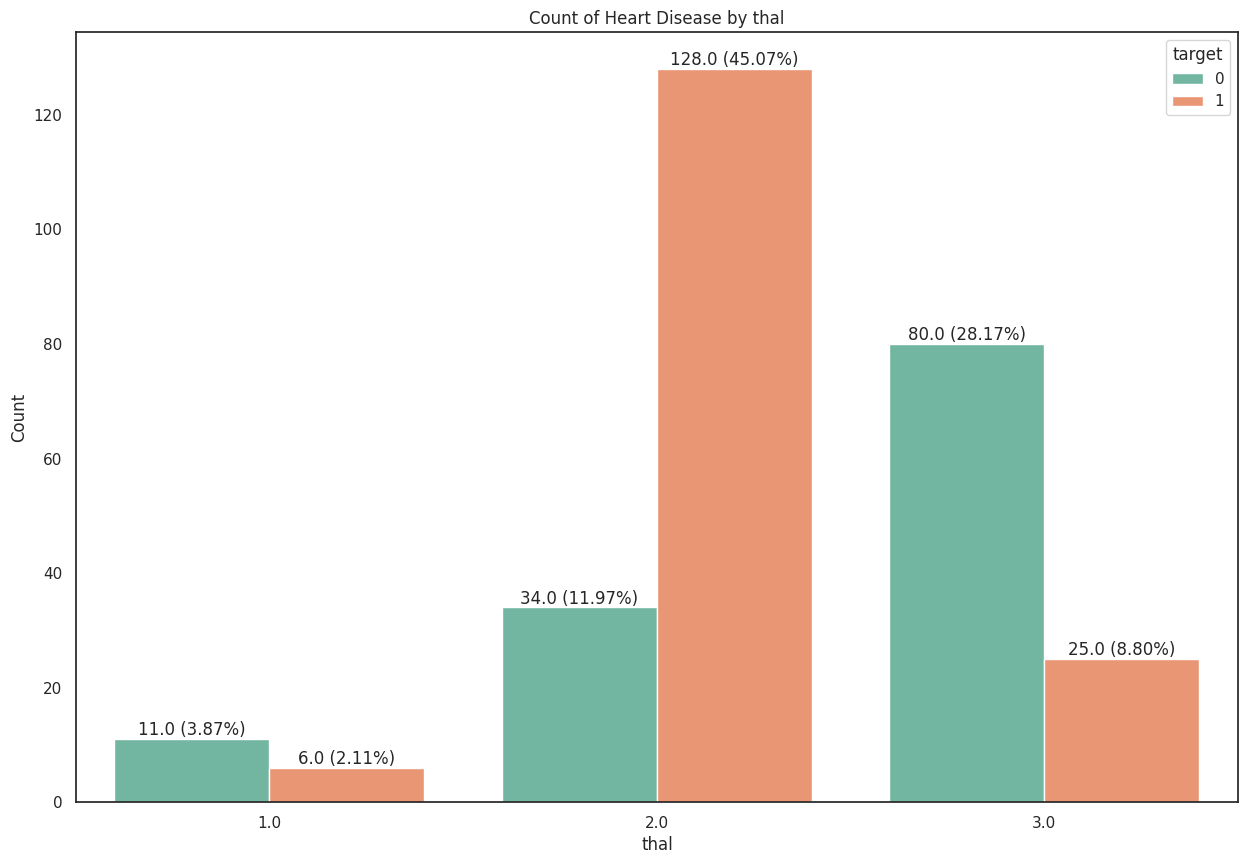

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create countplot
ax = sns.countplot(x='thal', hue='target', data=data, palette='Set2')

# Add labels and title
plt.xlabel('thal')
plt.ylabel('Count')
plt.title('Count of Heart Disease by thal')

# Calculate total count for each category
total_counts = data.groupby(['thal', 'target']).size()

# Add value and percentage labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height} ({height/total_counts.sum()*100:.2f}%)', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

# Show the plot
plt.show()

# thal: A blood disorder called thalassemia, categorical variable
# Value 1: fixed defect (no blood flow in some part of the heart)
# Value 2: normal blood flow
# Value 3: reversible defect (a blood flow is observed but it is not normal)
Participants of the normal blood flow in the thalassemia disorder seems to have a negative relationship with the heart disease, as the normal-blood-flow in the heart would lead to have more people who have heart disease in this study.

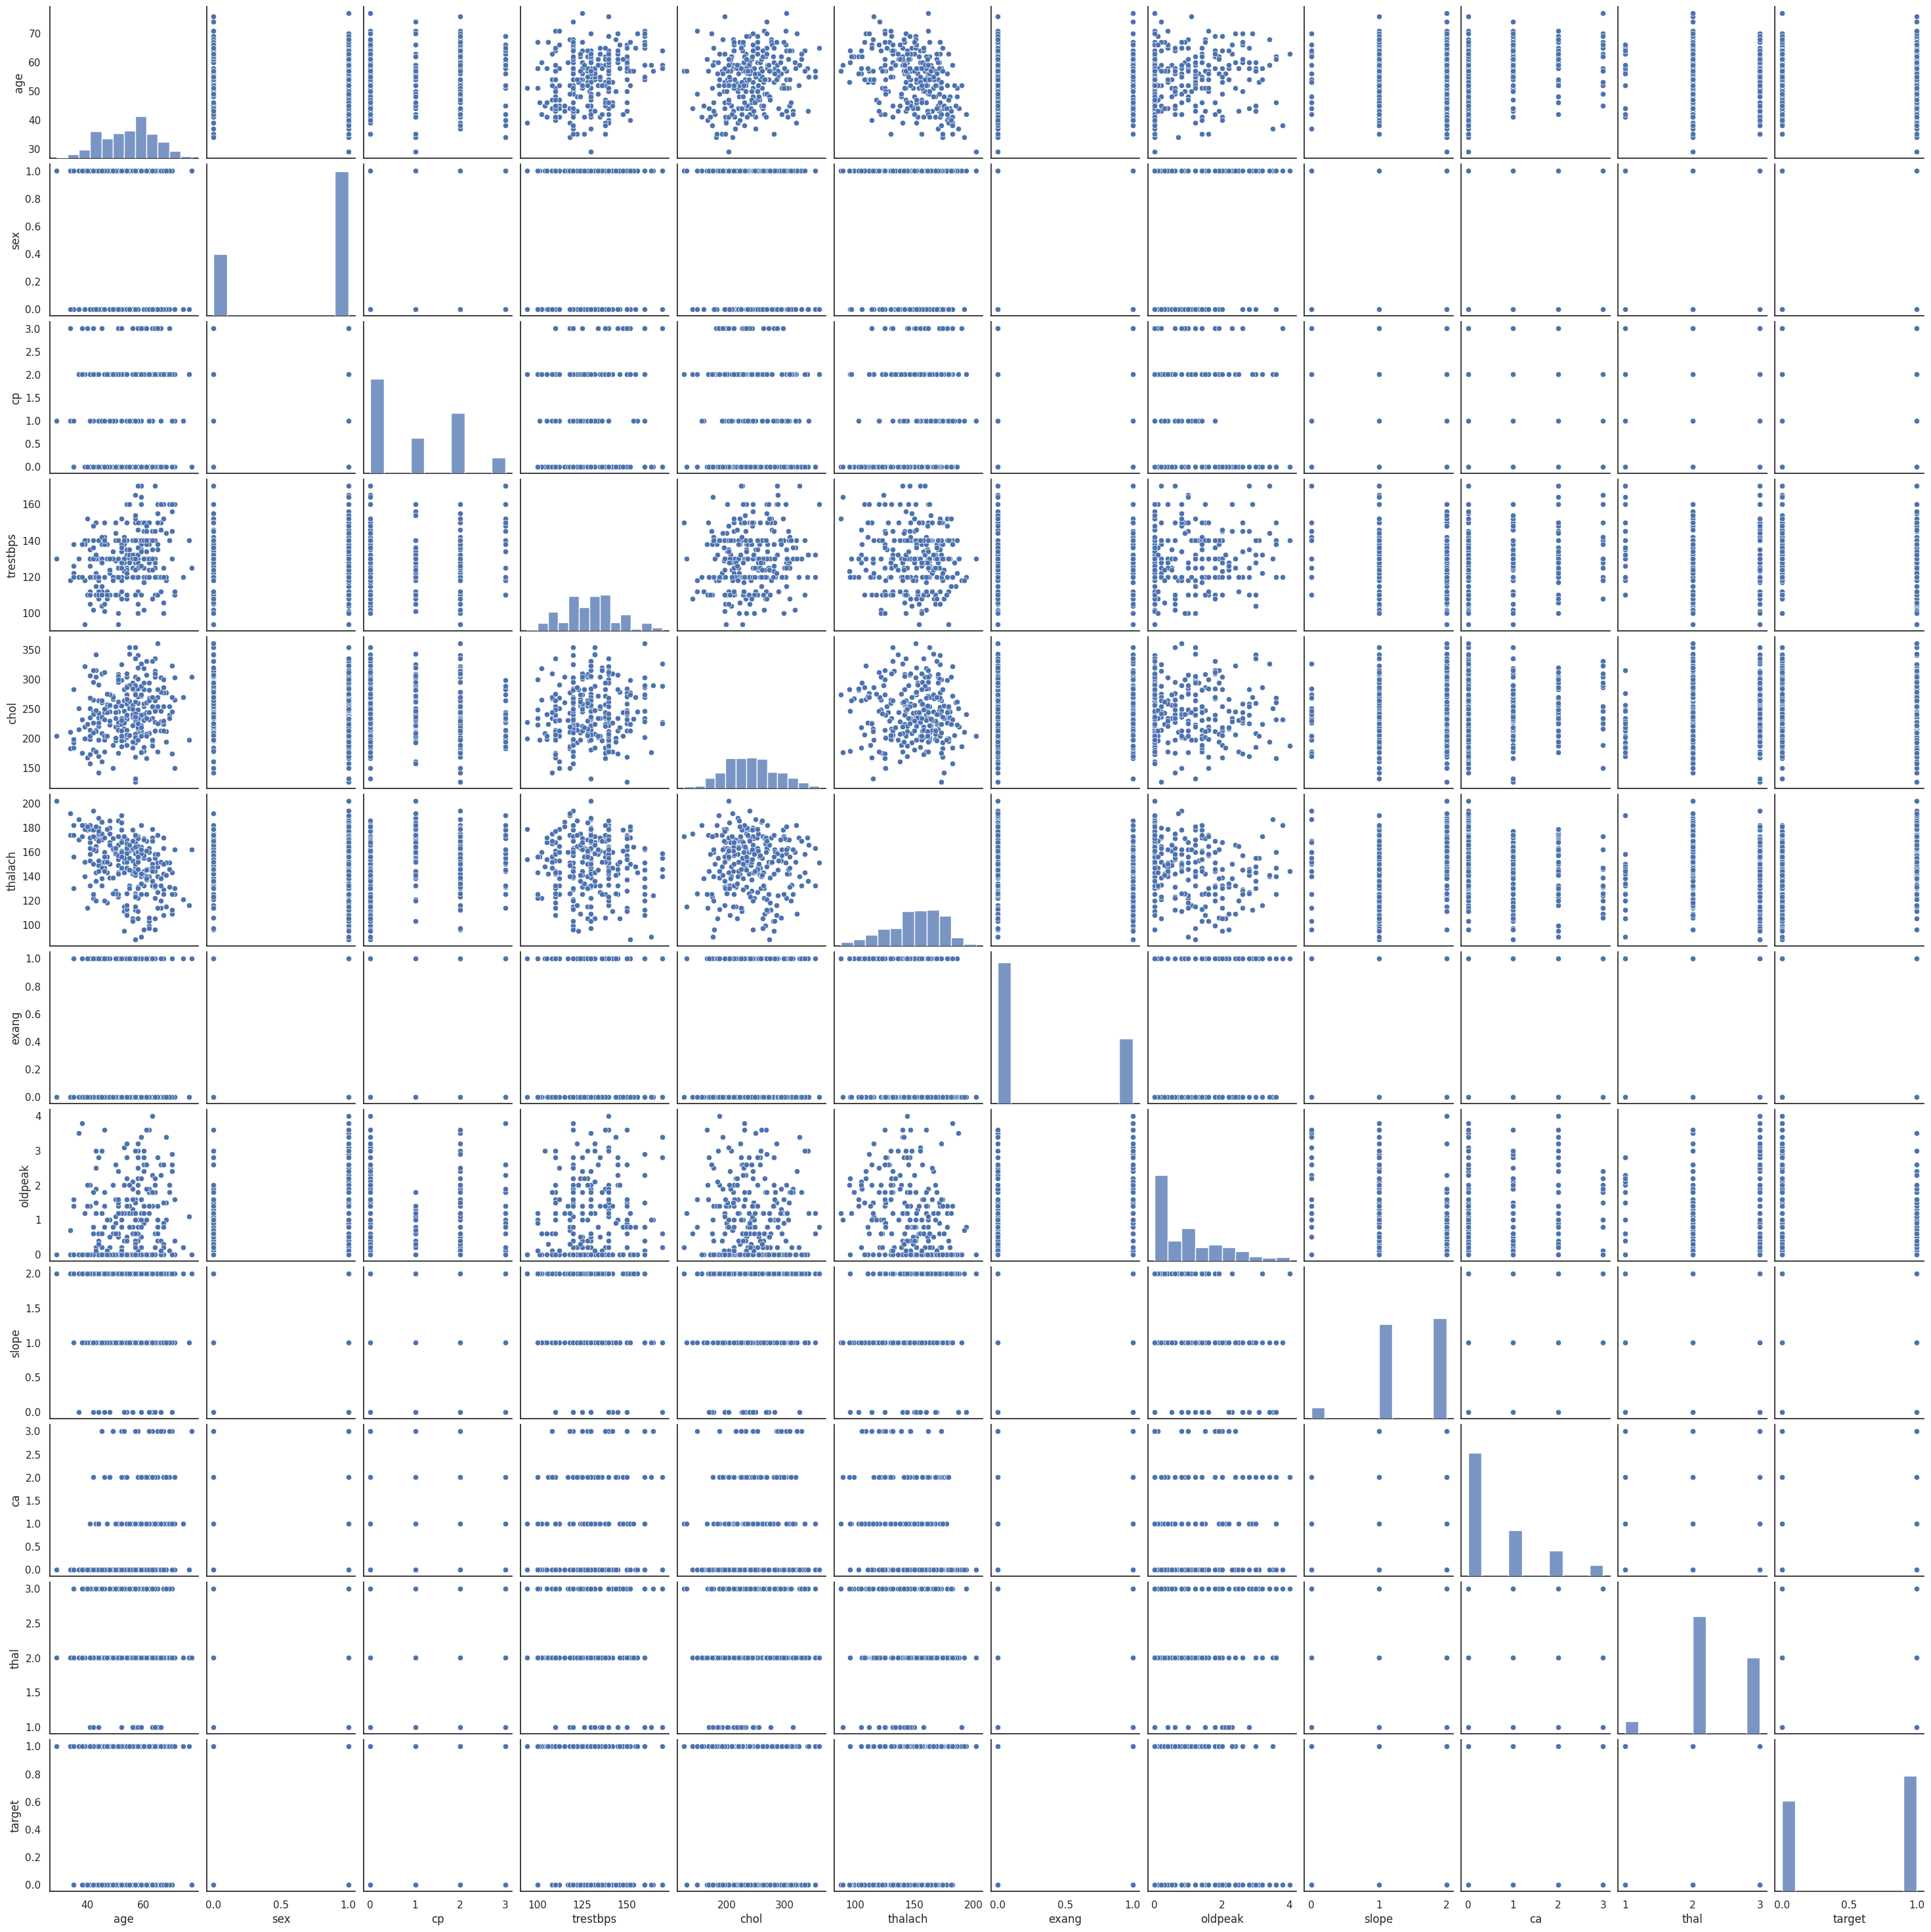

In [ ]:
import seaborn
import matplotlib.pyplot as plt
data
sns.pairplot(data)

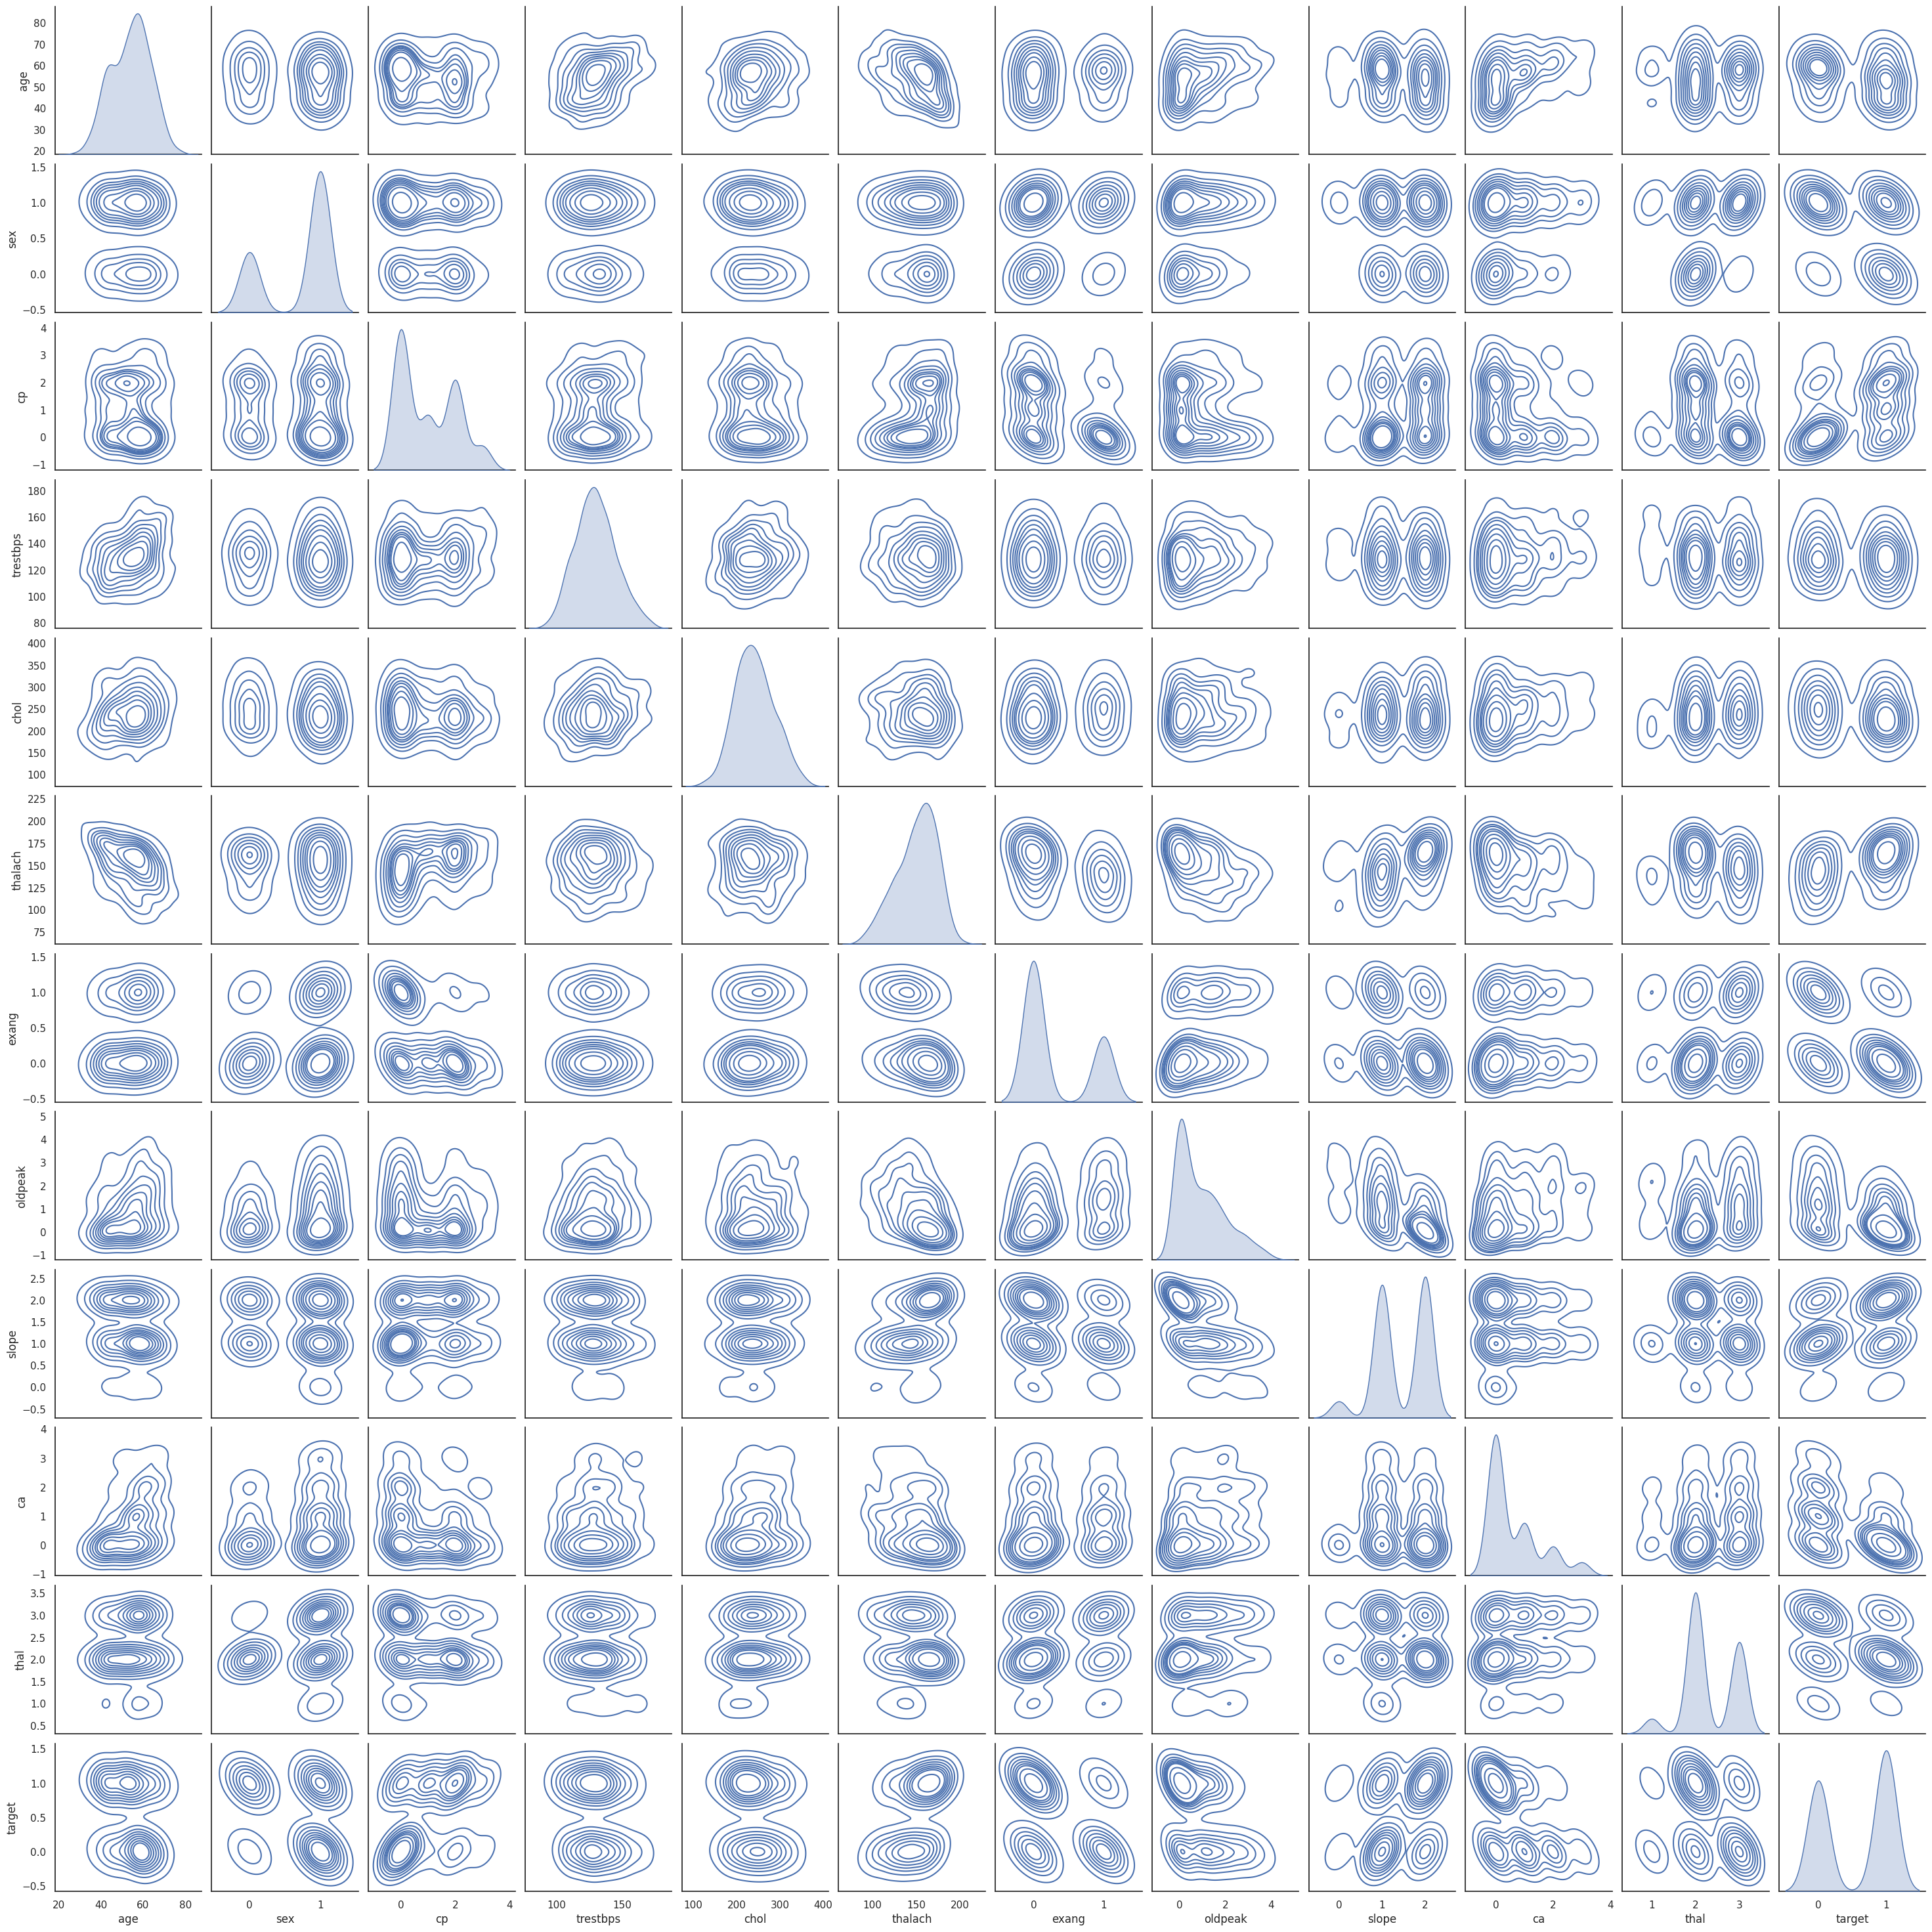

In [ ]:
import seaborn as sns

# Assuming you have a DataFrame called 'data' containing your variables

# Create a pairplot with distribution plots
sns.pairplot(data, kind='kde')

# Display the plot
plt.show()

Oldpeak seems to have a clear and linear separation relationship between disease and non-disease
thalach has some but mild linear separation relationship between disease and non-disease.
Others do not have any clear separation

In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object

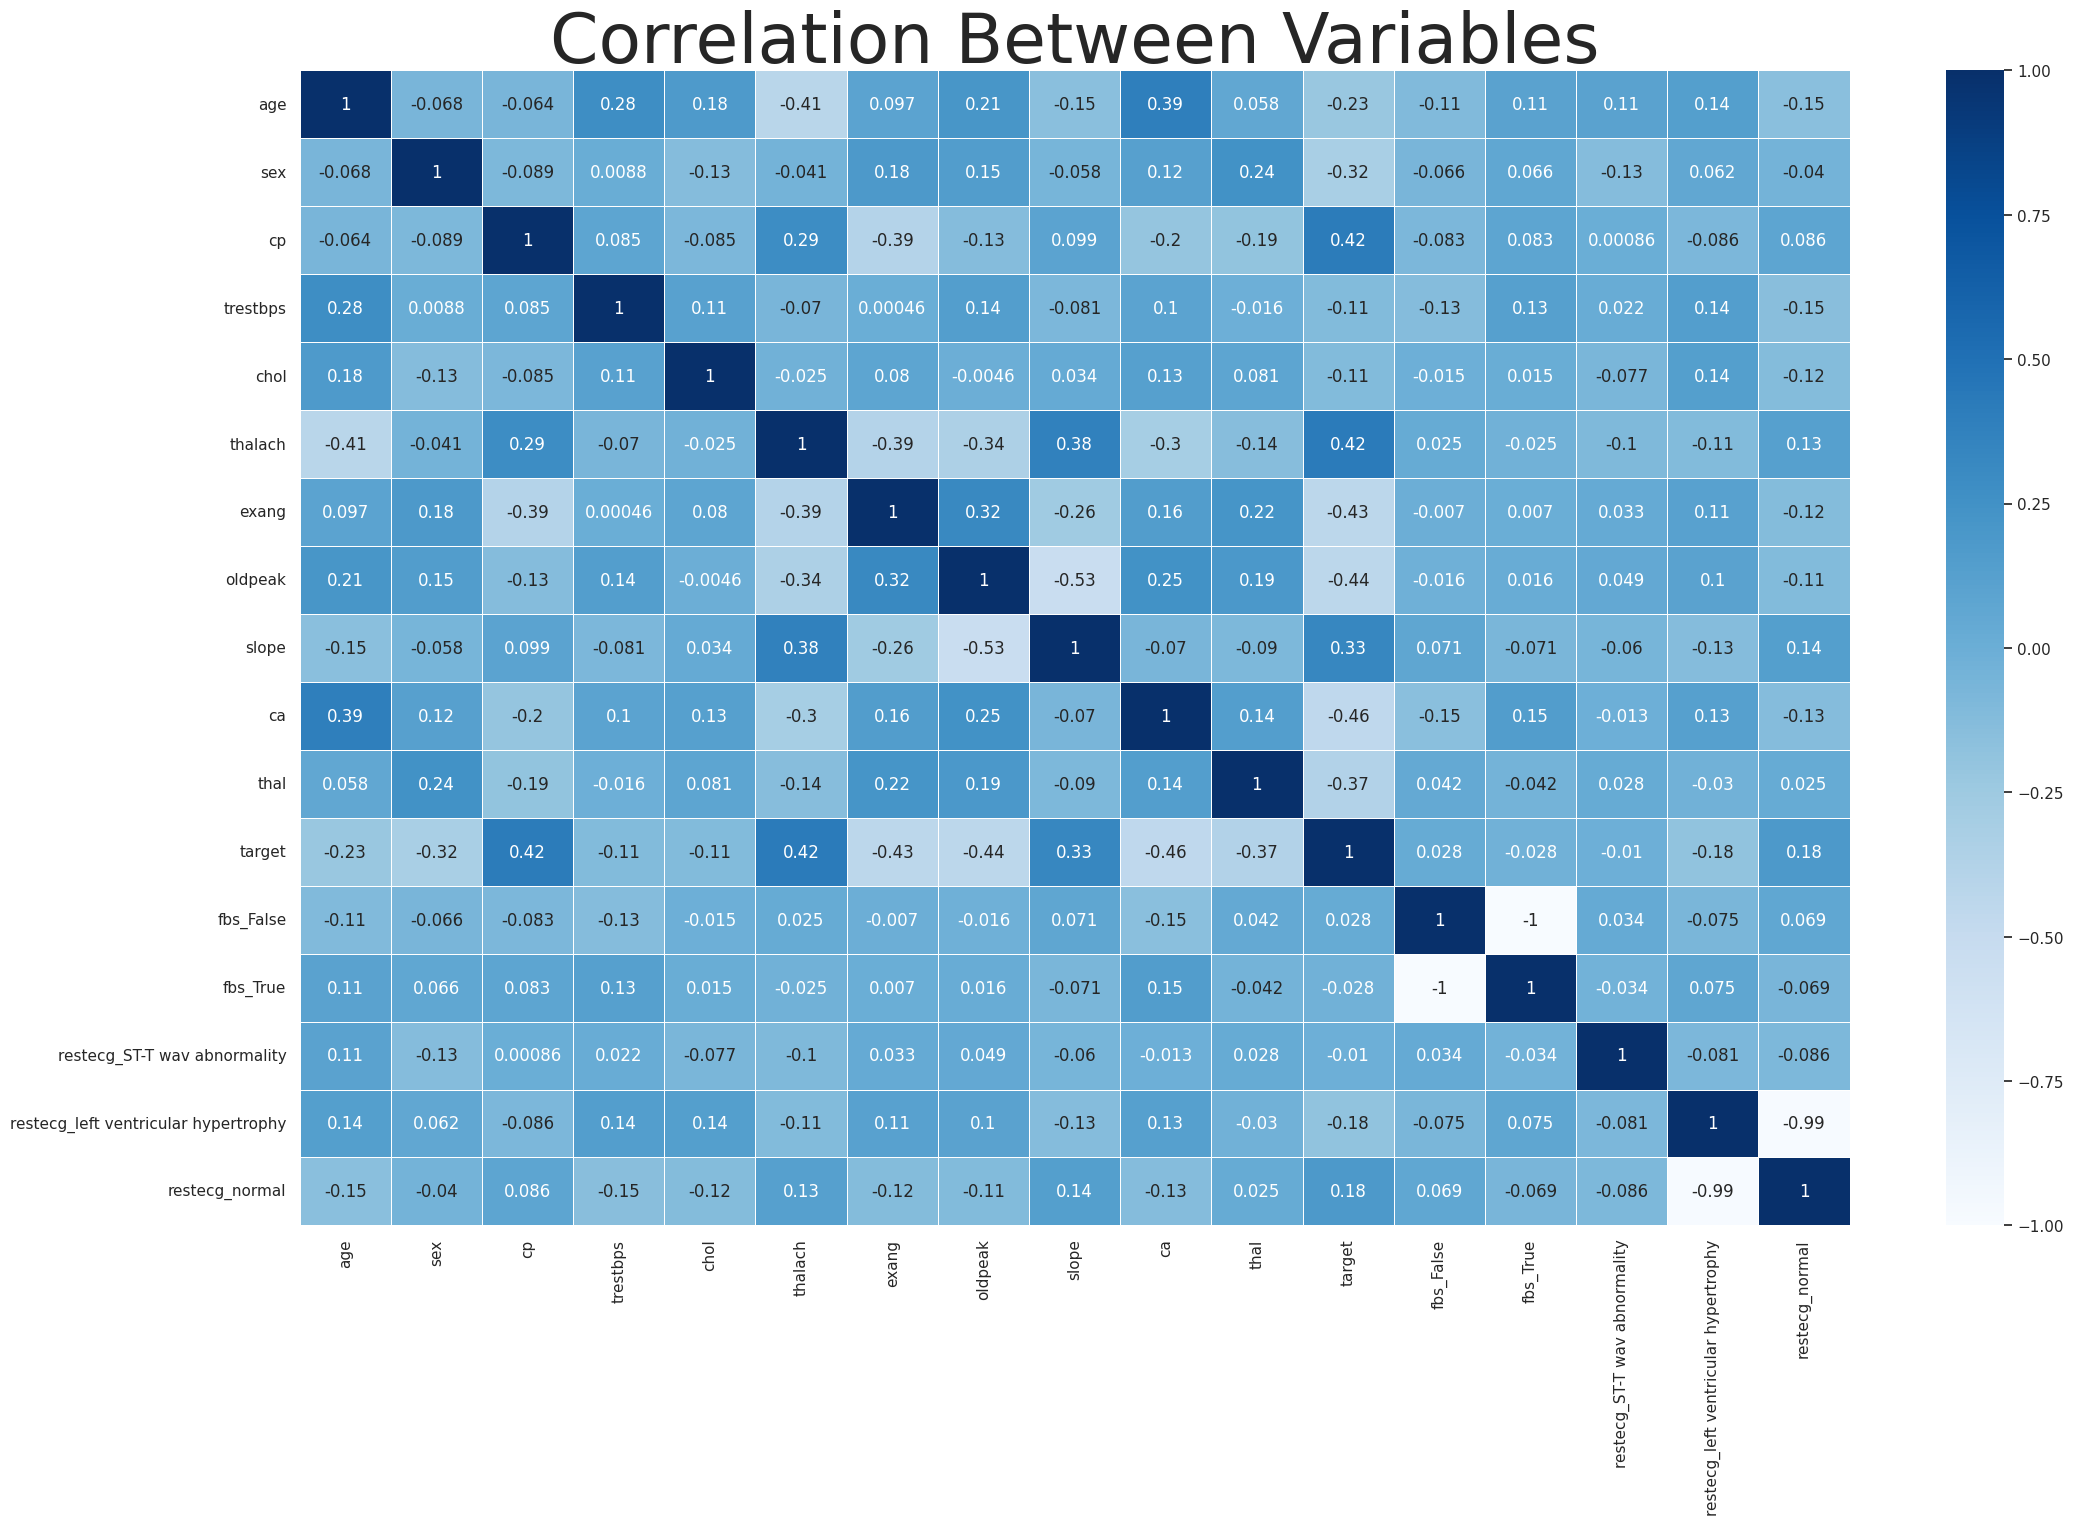

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' containing your data

# Select only the numerical variables from the DataFrame
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Perform one-hot encoding on the categorical variables
categorical_data = pd.get_dummies(data.select_dtypes(include=['object']))

# Concatenate the numerical and encoded categorical variables
encoded_df = pd.concat([numerical_data, categorical_data], axis=1)

# Create the correlation matrix
correlation_matrix = encoded_df.corr()

# Set up the figure and plot the heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, cmap="Blues")

plt.title('Correlation Between Variables', fontsize=50)
plt.show()


‘thalach’, ‘slope’ shows good positive correlation with target

‘oldpeak’, ‘exang’, ‘ca’,'cp', ‘thal’, ‘sex’, ‘age’ shows a good negative correlation with target

‘fbs’ ‘chol’, ‘trestbps’, ‘restecg’ has low correlation with our target